In [1]:
import pyam
import pandas as pd
import nomenclature
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.colors
sns.set_theme(style="whitegrid")

<IPython.core.display.Javascript object>

In [87]:
df_geo = pyam.read_iiasa(
    'geo7_internal',
    # variable=['GDP|PPP', 'Population', 'Food Demand', 'Final Energy', 'Primary Energy'],
    region='World',
    scenario='REF',
    model='AIM/Hub-Global 2.4',
)
df_geo.variable

pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-01-18 16:20:37 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-01-18 16:20:37 INFO     You are connected as user `LaszloVreedenburgh`


['Agricultural Demand',
 'Agricultural Demand|Energy',
 'Agricultural Demand|Energy|Crops',
 'Agricultural Demand|Energy|Crops|1st generation',
 'Agricultural Demand|Energy|Crops|2nd generation',
 'Agricultural Demand|Non-Energy',
 'Agricultural Demand|Non-Energy|Crops',
 'Agricultural Demand|Non-Energy|Crops|Feed',
 'Agricultural Demand|Non-Energy|Crops|Food',
 'Agricultural Demand|Non-Energy|Livestock',
 'Agricultural Demand|Non-Energy|Livestock|Food',
 'Agricultural Demand|Non-Energy|Livestock|Other',
 'Agricultural Production',
 'Agricultural Production|Energy',
 'Agricultural Production|Energy|Crops',
 'Agricultural Production|Non-Energy',
 'Agricultural Production|Non-Energy|Crops',
 'Agricultural Production|Non-Energy|Livestock',
 'Concentration|CH4',
 'Concentration|CO2',
 'Concentration|N2O',
 'Consumption',
 'Emissions|BC',
 'Emissions|BC|AFOLU',
 'Emissions|BC|Energy',
 'Emissions|BC|Energy|Demand|Industry',
 'Emissions|BC|Energy|Demand|Transportation',
 'Emissions|BC|Energy

# GDP

In [27]:
df_ar6 = pyam.read_iiasa(
    'ar6-public',
    variable=['GDP|PPP', 
              'Population', 
              'Food Demand', 
              'Final Energy', 
              'Primary Energy',
              'Food Demand|Crops',
              'Food Demand|Livestock',
              'Agricultural Production|Energy|Crops',
              'Forcing'],
    region='World',
    scenario=['SSP1-Baseline', 
              'SSP2-Baseline', 
              'SSP3-Baseline', 
              'SSP4-Baseline', 
              'SSP5-Baseline',],
    model='AIM/CGE 2.0',
)

df_geo = pyam.read_iiasa(
    'geo7_internal',
    variable=['GDP|PPP', 
              'Population', 
              'Food Demand', 
              'Final Energy', 
              'Primary Energy',
              'Food Demand|Crops',
              'Food Demand|Livestock',
              'Agricultural Production|Energy|Crops',
              'Forcing'],
    region='World',
    scenario='REF',
    model='AIM/Hub-Global 2.4',
)

pyam.iiasa - INFO: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
2024-01-24 17:08:10 INFO     You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-01-24 17:08:10 INFO     You are connected as user `LaszloVreedenburgh`
pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-01-24 17:08:18 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA

In [28]:
df_geo_data = df_geo.data
df_ar6_data = df_ar6.data
variables = df_geo_data.variable.unique()
# variables = ["Agricultural Demand"]
for variable in variables:
    # Use Seaborn to create the plot with markers and lines
    geo_data = df_geo_data[df_geo_data["variable"] == variable]
    ar6_data = df_ar6_data[df_ar6_data["variable"] == variable]
    # # Define the color palette for scenarios
    scenario_colors = {
        "REF": "black",
        "REF-1p5C": "blue",
        "LIFE-TP": "orange",
        "TECH-TP": "magenta",
    }

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    sns.lineplot(
        data=geo_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        linewidth=2.5,
        ax=ax
    )
    sns.lineplot(
        data=ar6_data,
        x="year",
        y="value",
        linewidth=0,
        ax=ax,
        color='grey'
    )
    ax.legend().set_visible(False)
    # Set labels and title
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(geo_data["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    plt.title(variable)  # Set the title to the variable
    plt.xticks([2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100], 
               rotation=45,
               fontsize=12)
    plt.yticks(fontsize=12)

    # Manually add Legend
    handles, labels = ax.get_legend_handles_labels()
    legend_patch = mpatches.Patch(color='grey', alpha=0.3)
    handles = handles + [legend_patch]
    labels = labels + ['SSP-Baselines']
    fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.15, 0.9)) 
    plt.grid(True)
    # Adjust layout to ensure legend fits within the saved image
    plt.tight_layout()
    root_variable = variable.split("|")[0].replace(" ", "_")
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    plt.savefig(f"./plots/chapter_11/{variable_name}.png", bbox_inches="tight")
    plt.close()
    

# GDP and Pop in one panel

In [13]:
df_ar6 = pyam.read_iiasa(
    'ar6-public',
    variable=['GDP|PPP', 
              'Population', 
            ],
    region='World',
    scenario=['SSP1-Baseline', 
              'SSP2-Baseline', 
              'SSP3-Baseline', 
              'SSP4-Baseline', 
              'SSP5-Baseline',],
    model='AIM/CGE 2.0',
)

# df_geo = pyam.read_iiasa(
#     'geo7_internal',
#     variable=['GDP|PPP', 
#               'Population', 
#               ],
#     region='World',
#     scenario='REF',
#     # model='IFs*',
# )
df_geo = pyam.read_iiasa(
    'ar6-public',
    variable=['GDP|PPP', 
              'Population', 
            ],
    region='World',
    scenario=[
              'SSP2-Baseline', 
              ],
    model='MESSAGE-GLOBIOM 1.0',
)

pyam.iiasa - INFO: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
2024-01-25 11:46:07 INFO     You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-01-25 11:46:07 INFO     You are connected as user `LaszloVreedenburgh`
pyam.iiasa - INFO: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
2024-01-25 11:46:19 INFO     You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use thi

In [19]:
df_geo.rename({'scenario':{'SSP2-Baseline': 'Current Trend'}}, inplace=True)

In [20]:
df_geo.timeseries()

2005  \
model               scenario      region variable   unit                           
MESSAGE-GLOBIOM 1.0 Current Trend World  GDP|PPP    billion US$2010/yr  62186.08   
                                         Population million              6503.13   

                                                                            2010  \
model               scenario      region variable   unit                           
MESSAGE-GLOBIOM 1.0 Current Trend World  GDP|PPP    billion US$2010/yr  74281.68   
                                         Population million              6867.39   

                                                                             2020  \
model               scenario      region variable   unit                            
MESSAGE-GLOBIOM 1.0 Current Trend World  GDP|PPP    billion US$2010/yr  111368.95   
                                         Population million               7611.25   

                                                                             2030  \
model               scenario      region variable   unit                            
MESSAGE-GLOBIOM 1.0 Current Trend World  GDP|PPP    billion US$2010/yr  157376.67   
                                         Population million               8261.99   

                                                                             2040  \
model               scenario      region variable   unit                            
MESSAGE-GLOBIOM 1.0 Current Trend World  GDP|PPP    billion US$2010/yr  204550.06   
                                         Population million               8787.12   

                                                                             2050  \
model               scenario      region variable   unit                            
MESSAGE-GLOBIOM 1.0 Current Trend World  GDP|PPP    billion US$2010/yr  254430.22   
                                         Population million               9169.11   

                                                                             2060  \
model               scenario      region variable   unit                            
MESSAGE-GLOBIOM 1.0 Current Trend World  GDP|PPP    billion US$2010/yr  308566.94   
                                         Population million               9384.70   

                                                                             2070  \
model               scenario      region variable   unit                            
MESSAGE-GLOBIOM 1.0 Current Trend World  GDP|PPP    billion US$2010/yr  370533.35   
                                         Population million               9456.88   

                                                                             2080  \
model               scenario      region variable   unit                            
MESSAGE-GLOBIOM 1.0 Current Trend World  GDP|PPP    billion US$2010/yr  438348.02   
                                         Population million               9407.26   

                                                                             2090  \
model               scenario      region variable   unit                            
MESSAGE-GLOBIOM 1.0 Current Trend World  GDP|PPP    billion US$2010/yr  512431.15   
                                         Population million               9253.95   

                                                                             2100  
model               scenario      region variable   unit                           
MESSAGE-GLOBIOM 1.0 Current Trend World  GDP|PPP    billion US$2010/yr  593265.64  
                                         Population million               9032.42

In [22]:
df_geo_data = df_geo.filter(year=[2020,
                                    2025,
                                    2030,
                                    2035,
                                    2040,
                                    2045,
                                    2050,]).data
df_ar6_data = df_ar6.filter(year=[2020,
                                    2025,
                                    2030,
                                    2035,
                                    2040,
                                    2045,
                                    2050,]).data


# Use Seaborn to create the plot with markers and lines
geo_data_gdp = df_geo_data[df_geo_data["variable"] == 'GDP|PPP']
ar6_data_gdp = df_ar6_data[df_ar6_data["variable"] == 'GDP|PPP']

# Use Seaborn to create the plot with markers and lines
geo_data_pop = df_geo_data[df_geo_data["variable"] == 'Population']
ar6_data_pop = df_ar6_data[df_ar6_data["variable"] == 'Population']
# # Define the color palette for scenarios
scenario_colors = {
    "Current Trend": "black",
    "REF-1p5C": "blue",
    "LIFE-TP": "orange",
    "TECH-TP": "magenta",
}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
sns.lineplot(
    data=geo_data_gdp,
    x="year",
    y="value",
    hue="scenario",
    palette=scenario_colors,
    linewidth=2.5,
    ax=axes[0]
)
sns.lineplot(
    data=ar6_data_gdp,
    x="year",
    y="value",
    linewidth=0,
    ax=axes[0],
    color='grey'
)

sns.lineplot(
    data=geo_data_pop,
    x="year",
    y="value",
    hue="scenario",
    palette=scenario_colors,
    linewidth=2.5,
    ax=axes[1]
)
sns.lineplot(
    data=ar6_data_pop,
    x="year",
    y="value",
    linewidth=0,
    ax=axes[1],
    color='grey'
)

axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)
# Set labels and title
# plt.xlabel("Year", fontsize=12)
axes[0].set_ylabel(geo_data_gdp["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
axes[1].set_ylabel(geo_data_pop["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
axes[0].set_ylim(min(0,axes[0].get_ylim()[0]), axes[0].get_ylim()[1])
axes[1].set_ylim(min(0,axes[1].get_ylim()[0]), axes[1].get_ylim()[1])
axes[0].set_title('GDP|PPP')  # Set the title to the variable
axes[1].set_title('Population')  # Set the title to the variable
# axes[0].set_xticks([2020, 2025, 2030, 2035, 2040, 2045, 2050], 
#             rotation=45,
#             fontsize=12)
# axes[1].set_xticks([2020, 2025, 2030, 2035, 2040, 2045, 2050], 
#             rotation=45,
#             fontsize=12)


# Manually add Legend
handles, labels = axes[1].get_legend_handles_labels()
legend_patch = mpatches.Patch(color='grey', alpha=0.3)
handles = handles + [legend_patch]
labels = labels + ['SSP-Baselines']
fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.15, 0.9)) 
plt.grid(True)
# Adjust layout to ensure legend fits within the saved image
plt.tight_layout()
plt.savefig(f"./plots/chapter_11/GPD_and_Pop.png", bbox_inches="tight")
plt.close()
    

# Energy

In [120]:
df_ar6 = pyam.read_iiasa(
    'ar6-public',
    variable=[
    'Primary Energy|Fossil',
    'Primary Energy|Biomass',
    'Primary Energy|Non-Biomass Renewables',
    'Primary Energy|Nuclear',
    'Primary Energy|Other',
    ],
    region='World',
    scenario=['SSP1-Baseline', 
              'SSP2-Baseline', 
              'SSP3-Baseline', 
              'SSP4-Baseline', 
              'SSP5-Baseline',],
    # model='AIM/CGE 2.0',
)

df_geo = pyam.read_iiasa(
    'geo7_internal',
    variable=['Primary Energy|Fossil',
              'Primary Energy|Biomass',
              'Primary Energy|Non-Biomass Renewables',
              'Primary Energy|Nuclear',
              'Primary Energy|Other',
              'Primary Energy|Coal', 
              'Primary Energy|Gas', 
              'Primary Energy|Oil',],
    region='World',
    scenario='REF',
    model='AIM/Hub-Global 2.4',
)

df_geo.aggregate("Primary Energy|Fossil", 
                       components=['Primary Energy|Coal', 
                                    'Primary Energy|Gas', 
                                    'Primary Energy|Oil', ], 
                        append=True)


stack_list = [
    'Primary Energy|Fossil',
    'Primary Energy|Biomass',
    'Primary Energy|Non-Biomass Renewables',
    'Primary Energy|Nuclear',
    'Primary Energy|Other',
]

df_ar6_energy = df_ar6.filter(variable=stack_list)
df_geo_energy = df_geo.filter(variable=stack_list)

pyam.iiasa - INFO: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
2024-01-18 17:13:13 INFO     You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-01-18 17:13:13 INFO     You are connected as user `LaszloVreedenburgh`
pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-01-18 17:13:20 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA

In [121]:
# Use Seaborn to create the plot with markers and lines
geo_data = df_ar6.filter(variable=stack_list).data
ar6_data = df_geo.filter(variable=stack_list).data
# # Define the color palette for scenarios
scenario_colors = {
    'Primary Energy|Fossil':'black',
    'Primary Energy|Biomass':'brown',
    'Primary Energy|Non-Biomass Renewables':'orange',
    'Primary Energy|Nuclear':'blue',
    'Primary Energy|Other':'magenta',
}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.lineplot(
    data=geo_data,
    x="year",
    y="value",
    hue="variable",
    palette=scenario_colors,
    linewidth=2.5,
    ax=ax
)
sns.lineplot(
    data=ar6_data,
    x="year",
    y="value",
    linewidth=0,
    ax=ax,
    hue="variable",
    palette=scenario_colors,
    # color='grey'
)
ax.legend().set_visible(False)
# Set labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel(geo_data["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
plt.title('Primary Energy Shares')  # Set the title to the variable
plt.xticks([2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100], 
            rotation=45,
            fontsize=12)
plt.yticks(fontsize=12)

# Manually add Legend
handles, labels = ax.get_legend_handles_labels()
legend_patch = mpatches.Patch(color='grey', alpha=0.3)
handles = handles[:5] + [legend_patch]
labels = labels[:5] + ['SSP-Baselines']
fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.35, 0.9)) 
plt.grid(True)
# Adjust layout to ensure legend fits within the saved image
plt.tight_layout()

plt.savefig(f"./plots/chapter_11/Primary_Energy_Shares.png", bbox_inches="tight")
plt.close()

In [104]:
variable_name

'Primary_Energy'

# C7 and C8 scenarios

In [22]:
c7_and_8 = ["SSP1-Baseline", "SSP4-Baseline", "CD-LINKS_INDCi", "CO_CurPol", "EN_NPi2100", "Baseline", "Reference", "CO_BAU", "ParisForever", "Ref", "SSP3-Baseline", "SSP4-Baseline", "NGFS1_Current policies (Hot house world, Rep)", "NGFS2_Current Policies", "R_BAU", "PR_CP_PriceOnly", "PR_baseline", "EN_INDCi2100", "EN_NPi2100", "EN_NPi2100_COV", "CO_BAU", "CO_CurPol", "CO_NDCplus", "EN_INDCi2100", "EN_NPi2100", "EN_NoPolicy", "ADVANCE_NoPolicy", "ADVANCE_Reference", "CD-LINKS_INDCi", "CD-LINKS_NPi", "CD-LINKS_NoPolicy", "EMF30_BCOC-EndU", "EMF30_Baseline", "EMF30_CH4-Only", "EMF30_D_BCOC-Red", "EMF30_D_CH4-ClimPolicy", "EMF30_D_Frozen-CH4", "EMF30_D_Frozen-EF", "EMF30_D_Frozen-EF-EndU", "EMF30_D_Frozen-EF-SLCF", "EMF30_SLCF", "SSP1-Baseline", "SSP2-60", "SSP2-Baseline", "SSP3-60", "SSP3-Baseline", "SSP4-60", "SSP4-Baseline", "SSP5-60", "SSP5-Baseline", "EMF33_Baseline", "SSP1-baseline", "SSP2-baseline", "SSP3-baseline", "SSP4-baseline", "SSP5-baseline", "EMF30_BCOC-EndU", "EMF30_Baseline", "EMF30_D_BCOC-Red", "EMF30_D_CH4-ClimPolicy", "EMF30_D_Frozen-CH4", "EMF30_D_Frozen-EF", "EMF30_D_Frozen-EF-EndU", "EMF30_D_Frozen-EF-SLCF", "EMF33_Baseline", "SSP1-Baseline", "SSP2-60", "SSP2-Baseline", "CD-LINKS_INDCi", "CD-LINKS_NPi", "CD-LINKS_NoPolicy", "NGFS2_Current Policies", "EN_NPi2100_COV", "EN_NPi2100", "EN_NoPolicy", "COV_GreenPush", "COV_GreenPush_max_GDP", "COV_GreenPush_min_GDP", "COV_NoPolicyNoCOVID", "COV_Restore", "COV_SelfReliance", "COV_SelfReliance_max_GDP", "COV_SelfReliance_min_GDP", "COV_SmartUse", "ADVANCE_NoPolicy", "ADVANCE_Reference", "CD-LINKS_NoPolicy", "EMF30_BCOC-EndU", "EMF30_Baseline", "EMF30_D_BCOC-Red", "EMF30_D_Frozen-CH4", "EMF30_D_Frozen-EF", "EMF30_D_Frozen-EF-EndU", "EMF30_D_Frozen-EF-SLCF", "EMF33_Baseline", "EN_INDCi2100", "EN_INDCi2100_COV", "EN_NPi2100", "EN_NPi2100_COV", "CO_BAU", "CO_CurPol", "CO_GPP_notax", "CO_NDCplus", "EMF30_BCOC-EndU", "EMF30_Baseline", "EMF30_CH4-Only", "EMF30_D_BCOC-Red", "EMF30_D_CH4-ClimPolicy", "EMF30_D_Frozen-CH4", "EMF30_D_Frozen-EF", "EMF30_D_Frozen-EF-EndU", "EMF30_D_Frozen-EF-SLCF", "EMF30_SLCF", "EMF30_Slower-Action", "ADVANCE_NoPolicy", "ADVANCE_Reference", "CEMICS-Ref", "CEMICS_NPI", "LeastTotalCost_Base_brkLR15_SSP2_P50", "LeastTotalCost_Base_brkLR15_SSP5_P50", "LeastTotalCost_Base_brkSR15_SSP2_P50", "LeastTotalCost_Base_brkSR15_SSP5_P50", "LeastTotalCost_NPi_brkLR15_SSP2_P50", "LeastTotalCost_NPi_brkLR15_SSP5_P50", "LeastTotalCost_NPi_brkSR15_SSP2_P50", "LeastTotalCost_NPi_brkSR15_SSP5_P50", "R2p1_SSP2-Base", "R2p1_SSP2-NPi", "R2p1_SSP5-Base", "R2p1_SSP5-NDC", "R2p1_SSP5-NPi", "BEG-Base", "BEG-EG", "SSP1-Baseline", "SSP2-60", "SSP2-Baseline", "SSP5-60", "SSP5-Baseline", "CD-LINKS_INDCi", "CD-LINKS_NPi", "CD-LINKS_NoPolicy", "CO_BAU", "CO_CurPol", "CO_NDCplus", "EMF33_Baseline", "PEP_NDC", "PEP_NPi", "PEP_NoPolicy", "SMP_REF_Def", "SMP_REF_Sust", "Diff_No-policy_baseline", "CEMICS_SSP2-Npi", "EN_NPi2100", "EN_NPi2100_COV", "EN_NoPolicy", "NGFS2_Current Policies", "NGFS2_Current Policies - IPD-95th", "NGFS2_Current Policies - IPD-median", "SusDev_SSP2-NPi", "DeepElec_SSP2_Base", "DeepElec_SSP2_Npi", "Transport_NPi_Conv", "EN_INDCi2100", "EN_INDCi2100_COV", "EN_INDCi2100_NDCp", "EN_NPi2100", "EN_NPi2100_COV", "DISCRATE_Ref_dr2p", "DISCRATE_Ref_dr3p", "DISCRATE_Ref_dr4p", "DISCRATE_Ref_dr5p", "CO_BAU", "CO_CurPol", "EN_NPi2100", "EN_NoPolicy", "SSP1-Baseline", "SSP2-Baseline", "SSP3-Baseline", "SSP4-Baseline", "SSP5-Baseline", "ADVANCE_NoPolicy", "EMF30_BCOC-EndU", "EMF30_Baseline", "EMF30_CH4-Only", "EMF30_D_BCOC-Red", "EMF30_D_Frozen-CH4", "EMF30_D_Frozen-EF", "EMF30_D_Frozen-EF-EndU", "EMF30_D_Frozen-EF-SLCF", "EMF30_SLCF", "CD-LINKS_INDCi", "CD-LINKS_NPi", "CD-LINKS_NoPolicy", ]

df_ar6 = pyam.read_iiasa(
    'ar6-public',
    variable=['Final Energy', 
              'Primary Energy',
              'Secondary Energy|Electricity',
              ],
    region='World',
    scenario=c7_and_8,
    # model='AIM/CGE 2.0',
)

df_geo = pyam.read_iiasa(
    'geo7_internal',
    variable=['Final Energy', 
              'Primary Energy',
              'Secondary Energy|Electricity',],
    region='World',
    scenario='REF',
    model='AIM/Hub-Global 2.4',
)

pyam.iiasa - INFO: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
2024-01-30 09:56:16 INFO     You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-01-30 09:56:16 INFO     You are connected as user `LaszloVreedenburgh`
pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-01-30 09:56:28 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA

In [23]:
df_geo.rename({'scenario':{'REF': 'Current Trend'}}, inplace=True)
df_geo = df_geo.filter(year=[2010, 2020,
 2025,
 2030,
 2035,
 2040,
 2045,
 2050,])
df_ar6 = df_ar6.filter(year=[2010, 2020,
 2025,
 2030,
 2035,
 2040,
 2045,
 2050,])

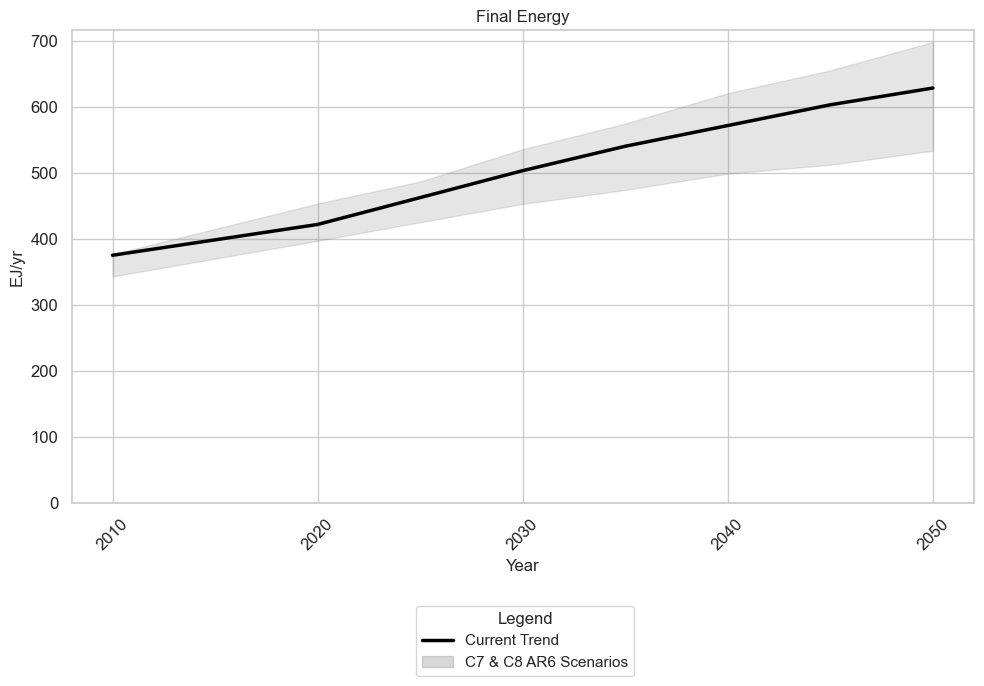

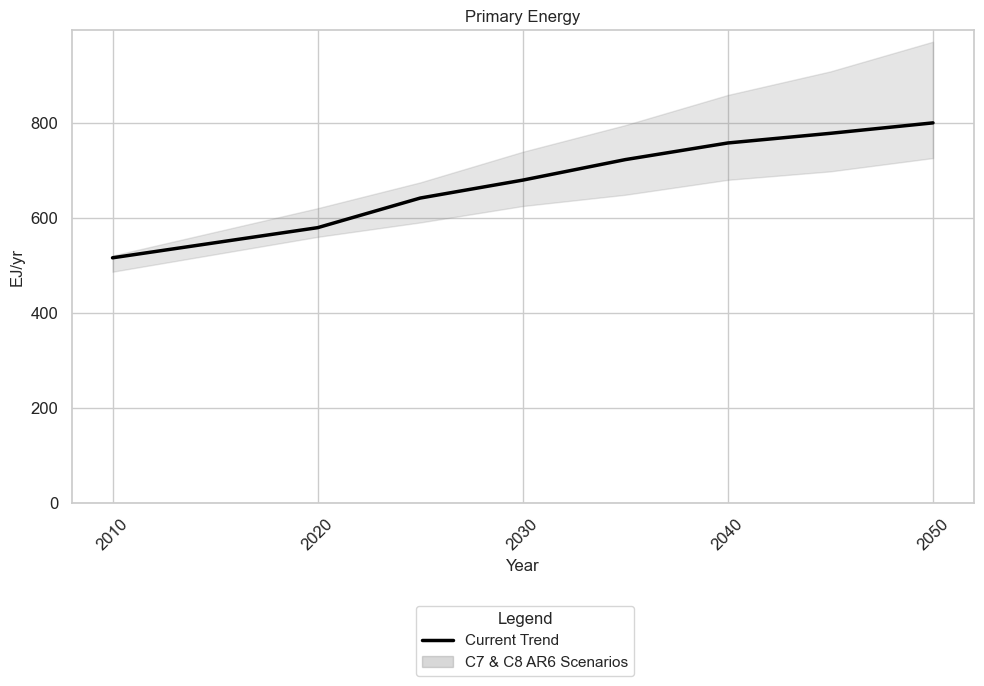

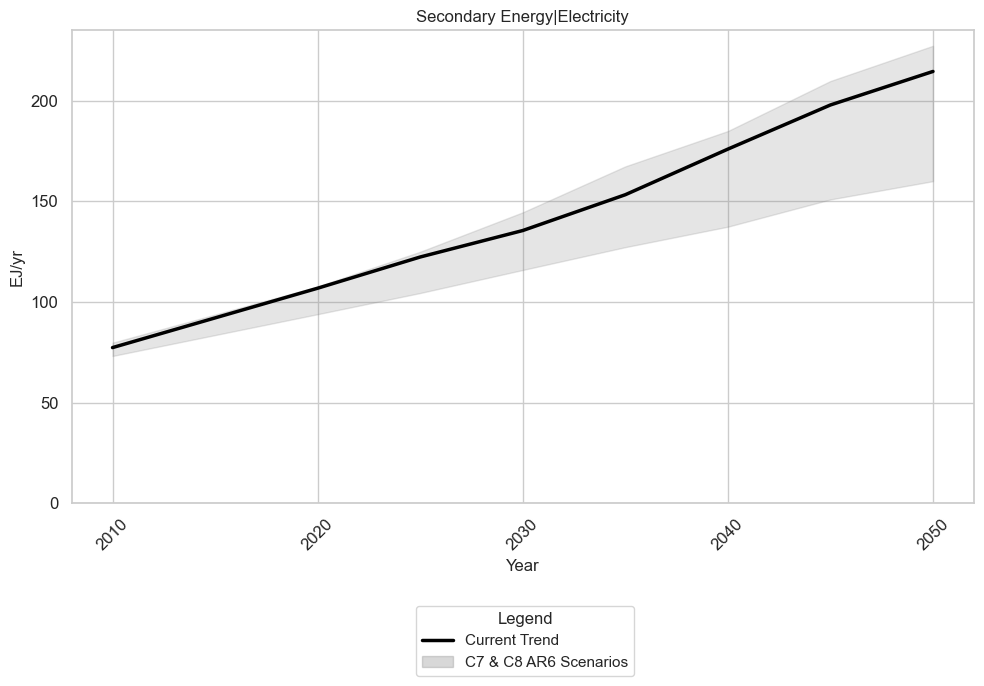

In [30]:
df_geo_data = df_geo.data
df_ar6_data = df_ar6.data
variables = df_geo_data.variable.unique()
# variables = ["Agricultural Demand"]
for variable in variables:
    # Use Seaborn to create the plot with markers and lines
    geo_data = df_geo_data[df_geo_data["variable"] == variable]
    ar6_data = df_ar6_data[df_ar6_data["variable"] == variable]
    # # Define the color palette for scenarios
    scenario_colors = {
        "Current Trend": "black",
        "REF-1p5C": "blue",
        "LIFE-TP": "orange",
        "TECH-TP": "magenta",
    }

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    sns.lineplot(
        data=geo_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        linewidth=2.5,
        ax=ax
    )
    sns.lineplot(
        data=ar6_data,
        x="year",
        y="value",
        linewidth=0,
        ax=ax,
        color='grey',
        errorbar=('sd', 1)
    )
    ax.legend().set_visible(False)
    # Set labels and title
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(geo_data["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    plt.title(variable)  # Set the title to the variable
    plt.xticks([2010, 2020, 2030, 2040, 2050], 
               rotation=45,
               fontsize=12)
    plt.yticks(fontsize=12)

    # Manually add Legend
    handles, labels = ax.get_legend_handles_labels()
    legend_patch = mpatches.Patch(color='grey', alpha=0.3)
    handles = handles + [legend_patch]
    labels = labels + ['C7 & C8 AR6 Scenarios']
    fig.legend(handles, labels, title="Legend", bbox_to_anchor=(0.65, -0.01)) 
    plt.grid(True)
    # Adjust layout to ensure legend fits within the saved image
    plt.tight_layout()
    root_variable = variable.split("|")[0].replace(" ", "_")
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    # plt.savefig(f"./plots/chapter_11/{variable_name}.png", bbox_inches="tight")
    # plt.close()
    

# Emissions

In [65]:
df_emissions_ar6 = pyam.read_iiasa(
    'ar6-public',
    variable=['Emissions|CO2', 
            'Emissions|N2O', 
            'Emissions|CH4', 
            'Emissions|F-Gases',
            'Emissions|Kyoto Gases', 
            'Emissions|BC', 
            'Emissions|CO', 
            'Emissions|NOx', 
            'Emissions|NH3', 
            'Emissions|OC', 
            'Emissions|Sulfur', 
            'Emissions|VOC'],
    region='World',
    scenario=['SSP1-Baseline', 
              'SSP2-Baseline', 
              'SSP3-Baseline', 
              'SSP4-Baseline', 
              'SSP5-Baseline',],
    model='AIM/CGE 2.0',
)
# Aggregate emissions CH4 and convert gases to CO2 equivalent
df_emissions_ar6.aggregate("Emissions|CH4", append=True)
df_emissions_ar6.convert_unit('Mt CH4/yr', to='Mt CO2e/yr', context='AR6GWP100', inplace=True)
df_emissions_ar6.convert_unit('kt N2O/yr', to='Mt CO2e/yr', context='AR6GWP100', inplace=True)
df_emissions_ar6.convert_unit('Mt CO2/yr', to='Mt CO2e/yr', inplace=True)
df_emissions_ar6.convert_unit('Mt CO2-equiv/yr', to='Mt CO2e/yr', inplace=True)
df_emissions_ar6.aggregate("Emissions|GHG", 
                       components=['Emissions|CO2', 
                                    'Emissions|N2O', 
                                    'Emissions|CH4', 
                                    'Emissions|F-Gases'], 
                        append=True)

pyam.iiasa - INFO: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
2024-02-05 10:47:25 INFO     You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-02-05 10:47:25 INFO     You are connected as user `LaszloVreedenburgh`
pyam.aggregation - INFO: Cannot aggregate variable 'Emissions|CH4' because it has no components!
2024-02-05 10:47:34 INFO     Cannot aggregate variable 'Emissions|CH4' because it has no components!


In [66]:
df_emissions_geo = pyam.read_iiasa(
    'geo7_internal',
    variable=['Emissions|CO2', 
            'Emissions|N2O', 
            # 'Emissions|CH4',
            'Emissions|CH4|AFOLU',
            'Emissions|CH4|Energy',
            'Emissions|CH4|Industrial Processes',
            'Emissions|CH4|Other',
            'Emissions|CH4|Waste',
            'Emissions|F-Gases',
            'Emissions|Kyoto Gases',
            'Emissions|BC', 
            'Emissions|CO', 
            'Emissions|NOx', 
            'Emissions|NH3', 
            'Emissions|OC', 
            'Emissions|Sulfur', 
            'Emissions|VOC'],
    region='World',
    scenario='REF',
    model='AIM/Hub-Global 2.4',
)

# Aggregate emissions CH4 and convert gases to CO2 equivalent
df_emissions_geo.aggregate("Emissions|CH4", append=True)
df_emissions_geo.convert_unit('Mt CH4/yr', to='Mt CO2e/yr', context='AR6GWP100', inplace=True)
df_emissions_geo.convert_unit('kt N2O/yr', to='Mt CO2e/yr', context='AR6GWP100', inplace=True)
df_emissions_geo.convert_unit('Mt CO2/yr', to='Mt CO2e/yr', inplace=True)
df_emissions_geo.convert_unit('Mt CO2-equiv/yr', to='Mt CO2e/yr', inplace=True)
df_emissions_geo.aggregate("Emissions|GHG", 
                       components=['Emissions|CO2', 
                                    'Emissions|N2O', 
                                    'Emissions|CH4', 
                                    'Emissions|F-Gases'], 
                        append=True)

pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-02-05 10:47:34 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-02-05 10:47:34 INFO     You are connected as user `LaszloVreedenburgh`


Emissions|GHG
Emissions|Kyoto Gases
Emissions|BC
Emissions|CO
Emissions|NOx
Emissions|NH3
Emissions|OC
Emissions|Sulfur
Emissions|VOC
Emissions|CO2
Emissions|CH4
Emissions|N2O


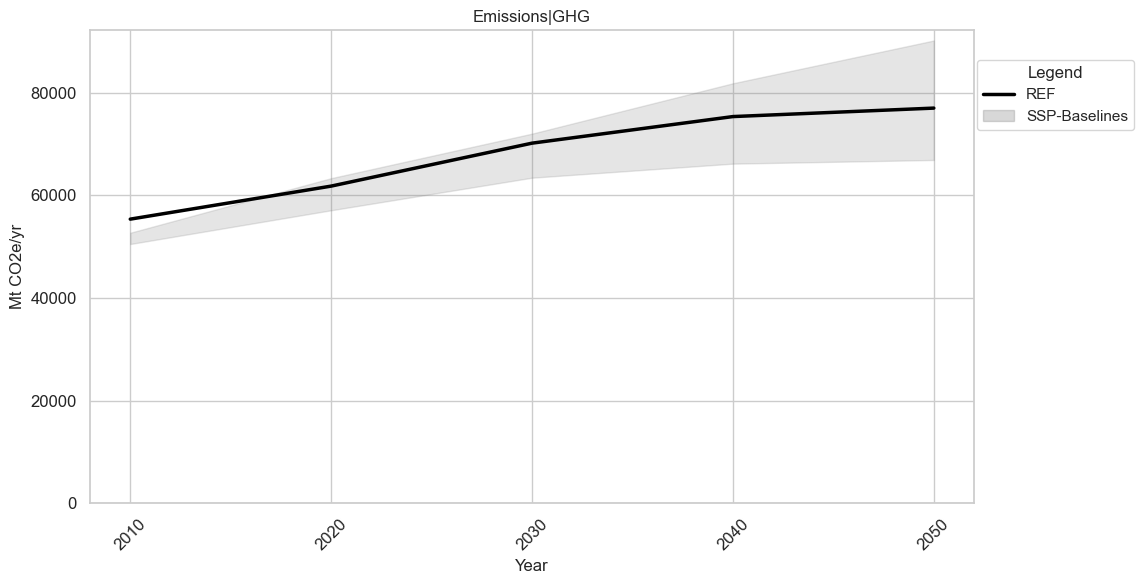

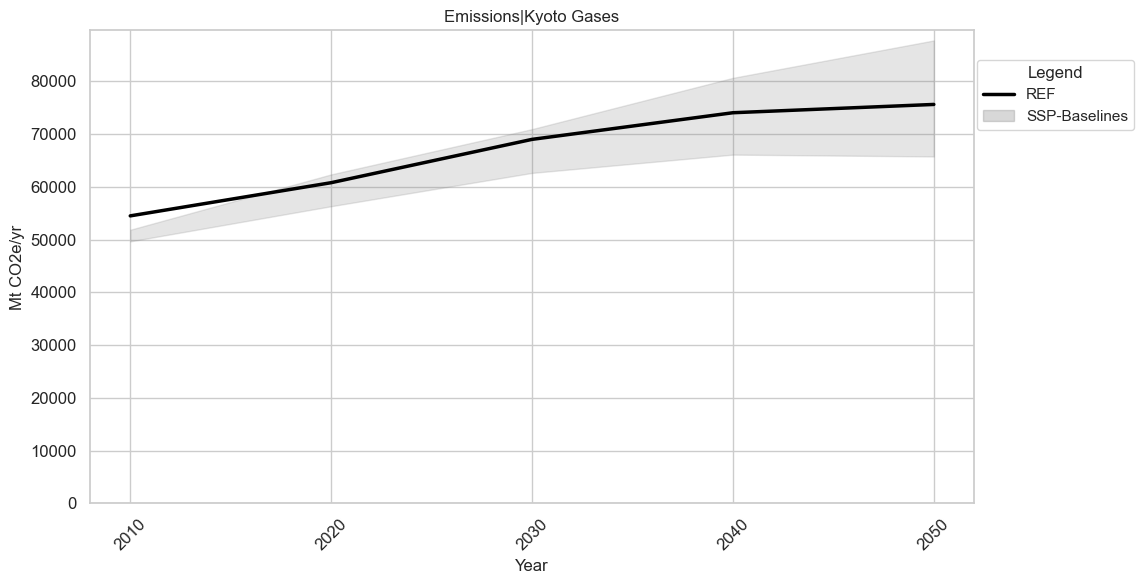

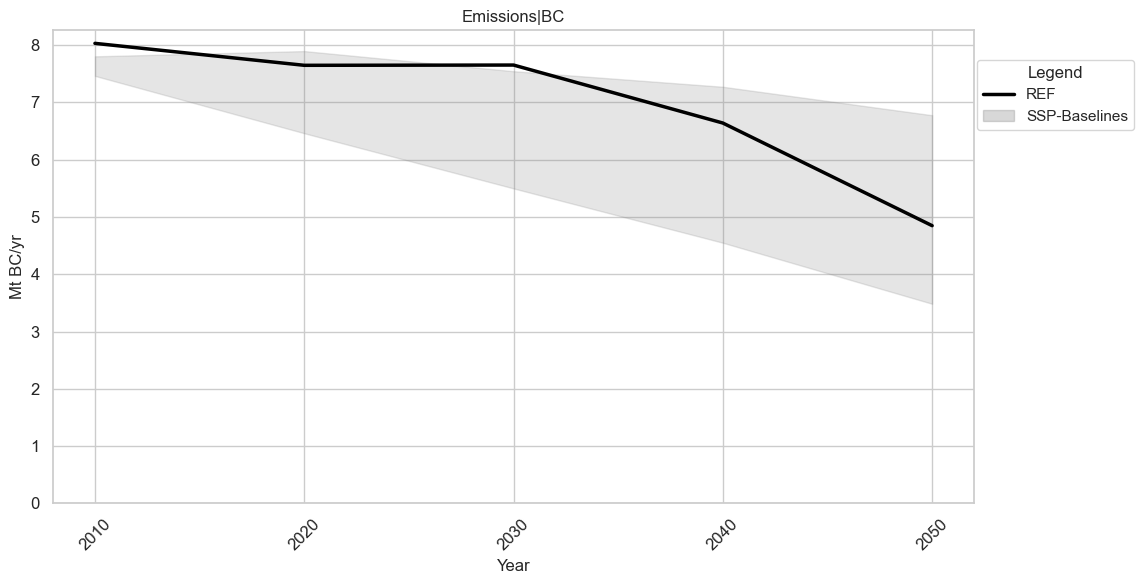

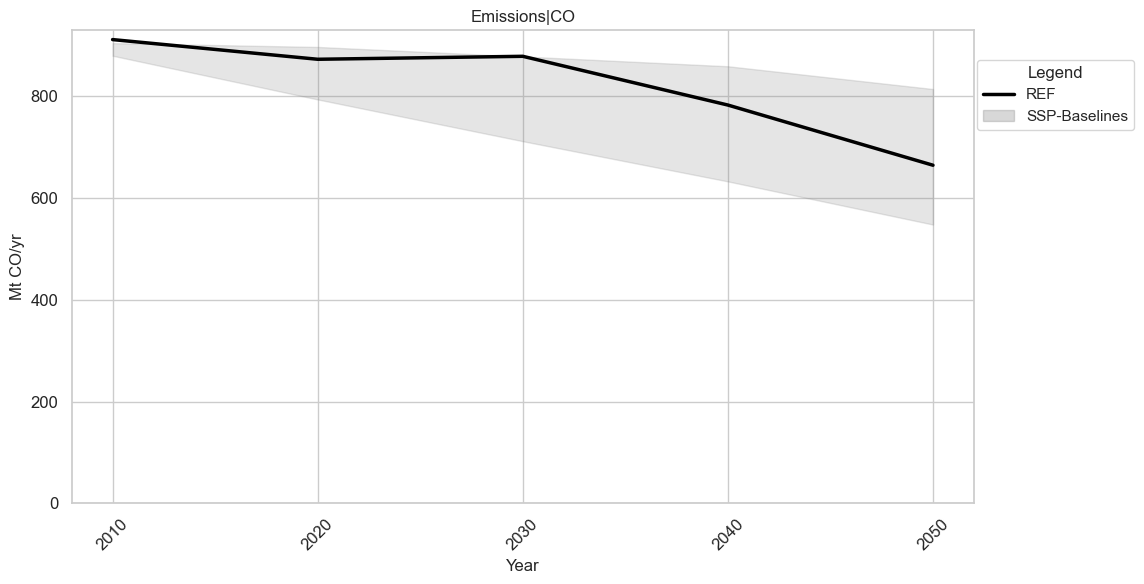

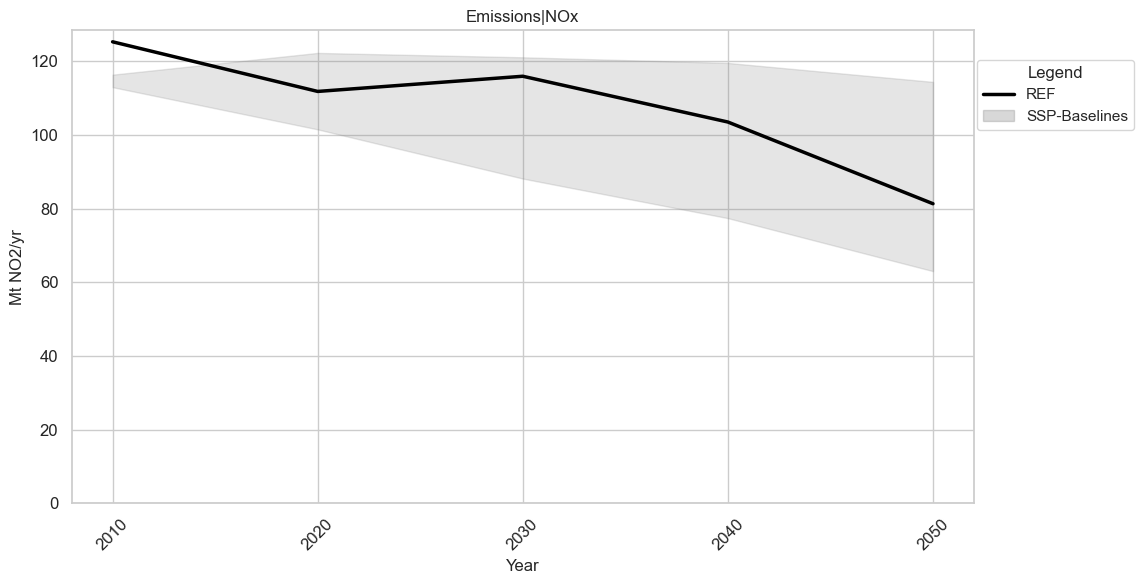

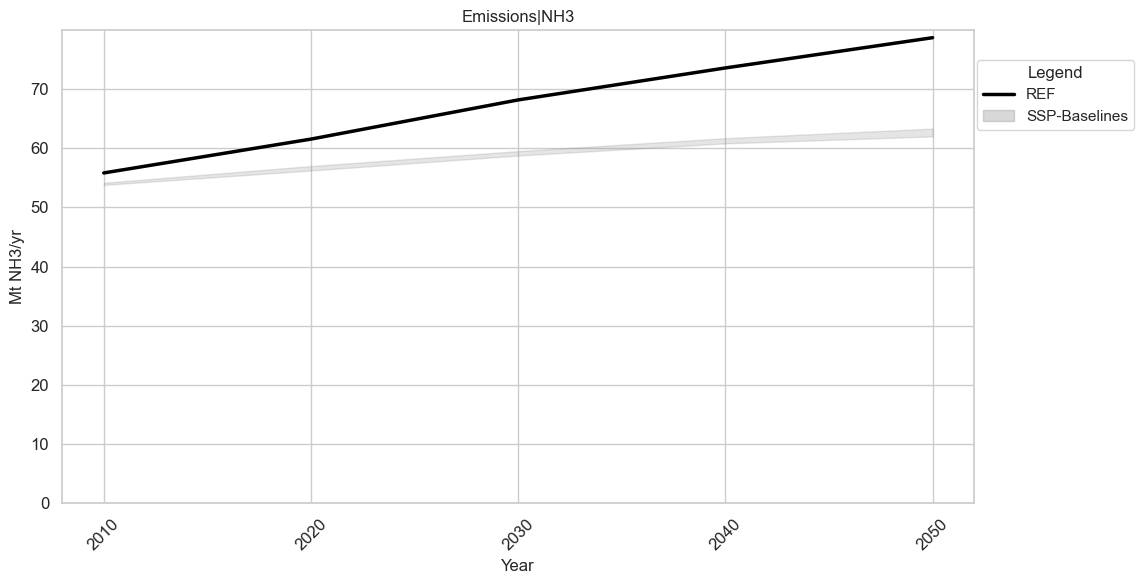

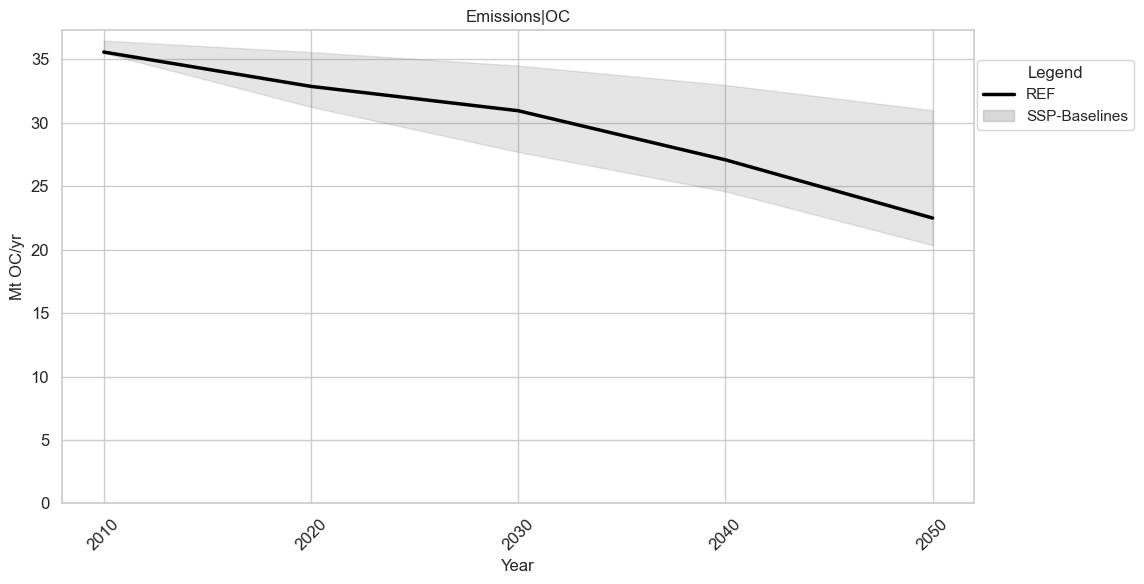

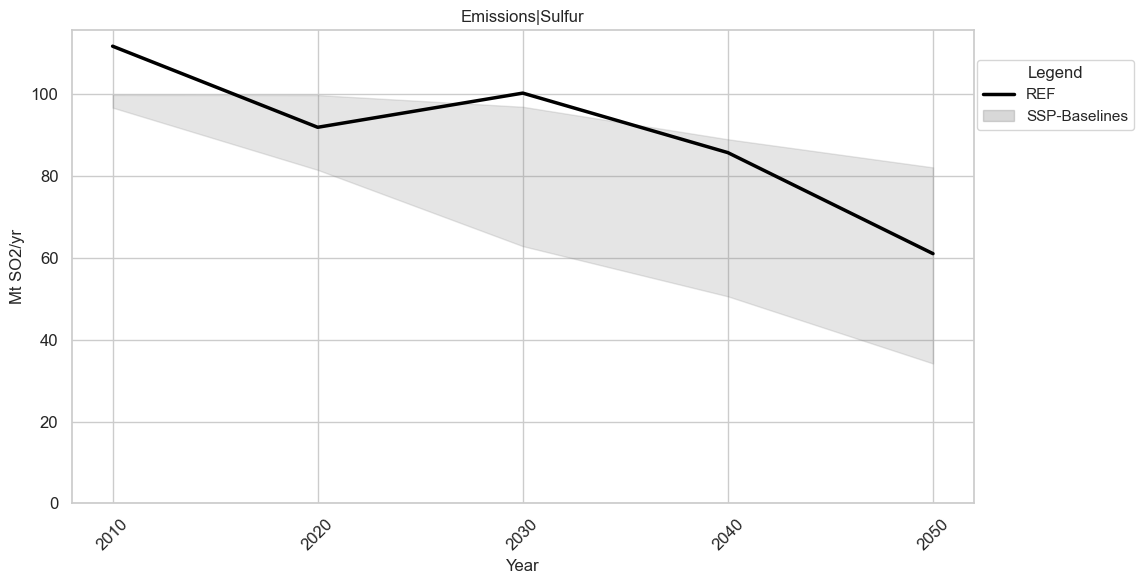

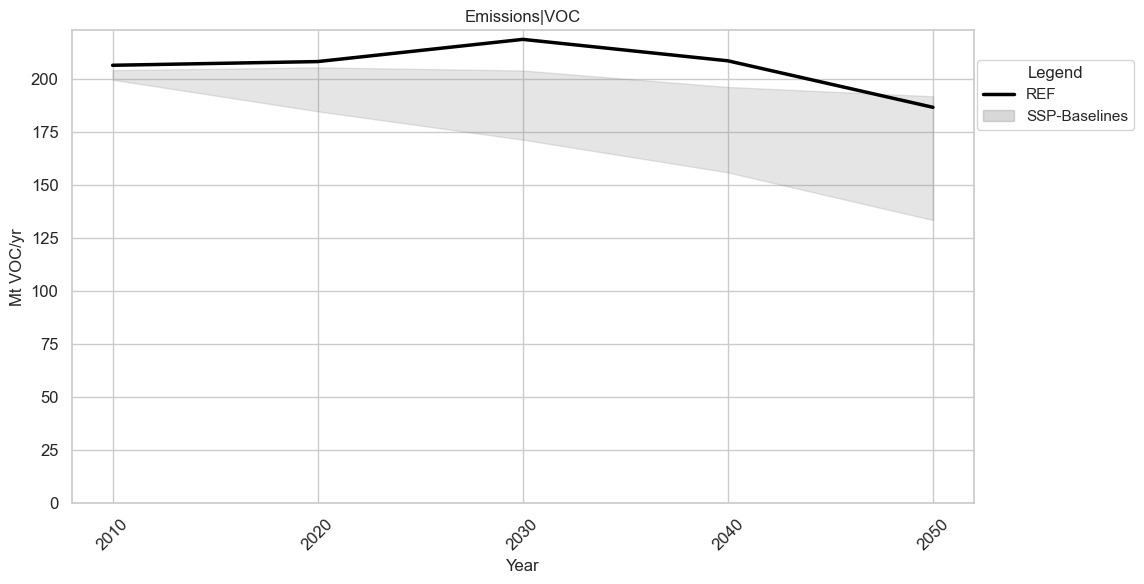

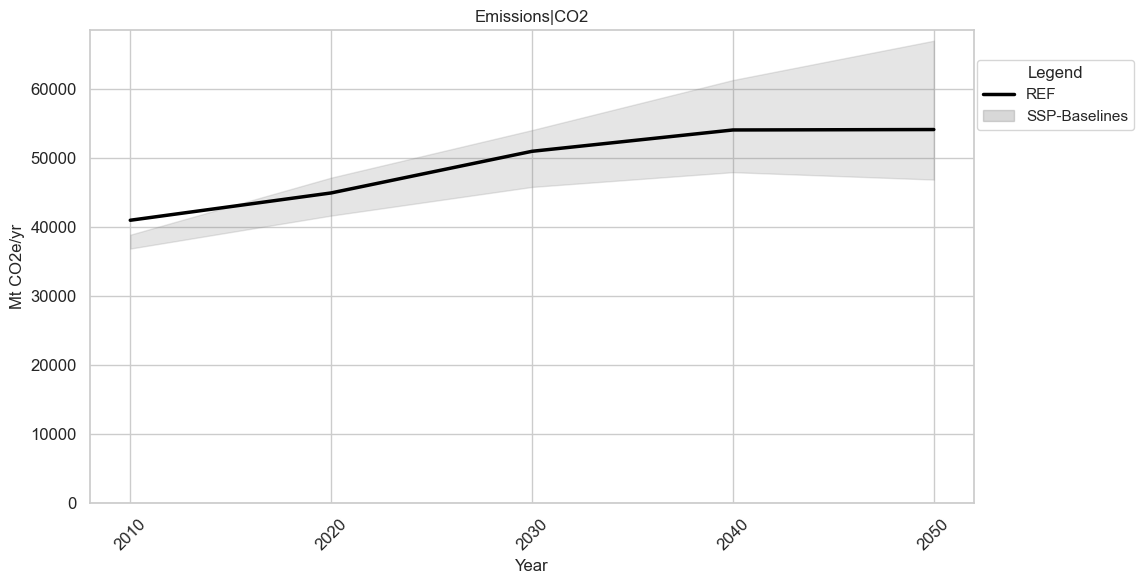

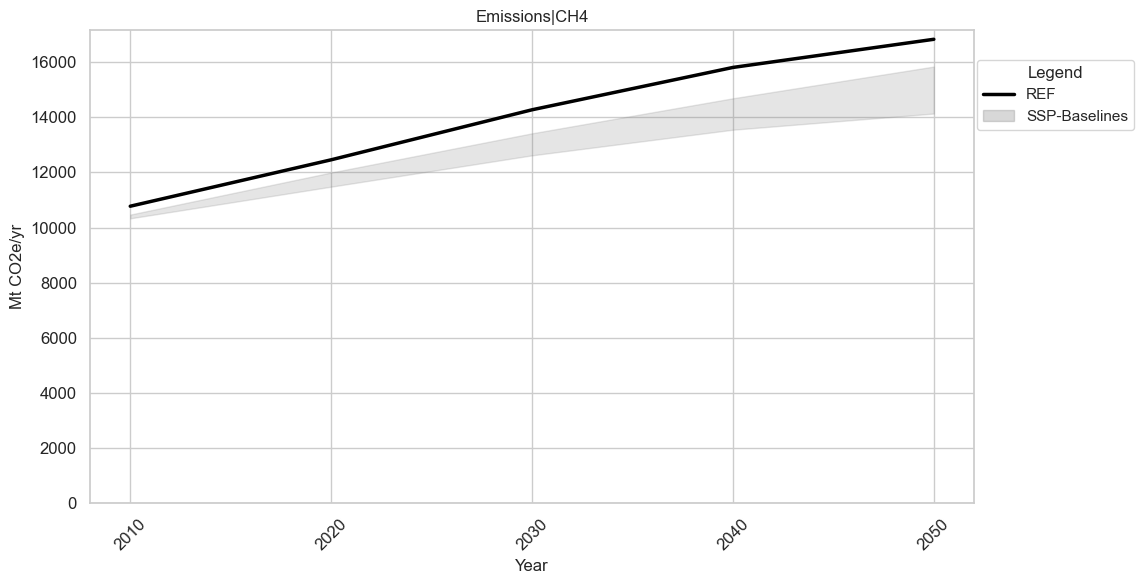

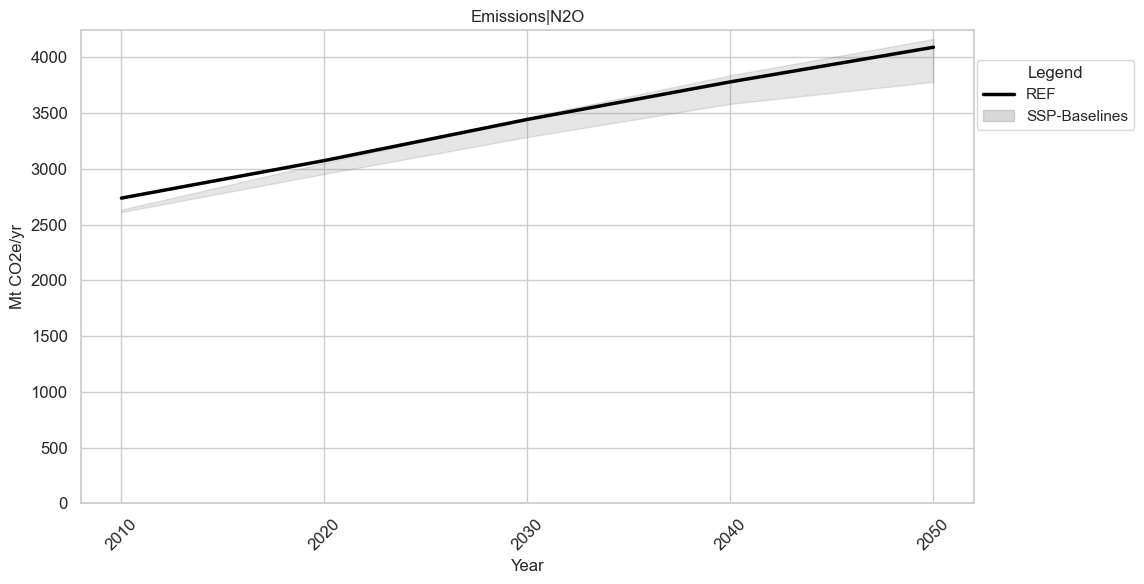

In [69]:
df_geo_data = df_emissions_geo.filter(year=[2010, 2020, 2030, 2040, 2050]).data
df_ar6_data = df_emissions_ar6.filter(year=[2010, 2020, 2030, 2040, 2050]).data
variables = ["Emissions|GHG", 
             'Emissions|Kyoto Gases',
             'Emissions|BC', 
             'Emissions|CO', 
             'Emissions|NOx', 
             'Emissions|NH3', 
             'Emissions|OC', 
             'Emissions|Sulfur', 
             'Emissions|VOC',
             'Emissions|CO2',
             'Emissions|CH4',
             'Emissions|N2O',
             ]
# variables = ["Agricultural Demand"]
for variable in variables:
    print(variable)
    # Use Seaborn to create the plot with markers and lines
    geo_data = df_geo_data[df_geo_data["variable"] == variable]
    ar6_data = df_ar6_data[df_ar6_data["variable"] == variable]
    # # Define the color palette for scenarios
    scenario_colors = {
        "REF": "black",
        "REF-1p5C": "blue",
        "LIFE-TP": "orange",
        "TECH-TP": "magenta",
    }

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    sns.lineplot(
        data=geo_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        linewidth=2.5,
        ax=ax
    )
    sns.lineplot(
        data=ar6_data,
        x="year",
        y="value",
        linewidth=0,
        ax=ax,
        color='grey'
    )
    ax.legend().set_visible(False)
    # Set labels and title
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(geo_data["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    plt.title(variable)  # Set the title to the variable
    plt.xticks([2010, 2020, 2030, 2040, 2050], 
               rotation=45,
               fontsize=12)
    plt.yticks(fontsize=12)

    # Manually add Legend
    handles, labels = ax.get_legend_handles_labels()
    legend_patch = mpatches.Patch(color='grey', alpha=0.3)
    handles = handles + [legend_patch]
    labels = labels + ['SSP-Baselines']
    fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.15, 0.9)) 
    plt.grid(True)
    # Adjust layout to ensure legend fits within the saved image
    plt.tight_layout()
    root_variable = variable.split("|")[0].replace(" ", "_")
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    # plt.savefig(f"./plots/chapter_11/{variable_name}.png", bbox_inches="tight")
    # plt.close()

In [28]:
emissions_data_ar6 = df_emissions_ar6.filter(variable=['Emissions|CO2', 
                                                'Emissions|N2O', 
                                                'Emissions|CH4', 
                                                'Emissions|F-Gases'], 
                                    year=[2050]).data
emissions_data_geo = df_emissions_geo.filter(variable=['Emissions|CO2', 
                                                'Emissions|N2O', 
                                                'Emissions|CH4', 
                                                'Emissions|F-Gases'], 
                                    year=[2050]).data

variables = emissions_data_geo.variable.unique()
for variable in variables:
    temp_ar6 = emissions_data_ar6[emissions_data_ar6['variable'] == variable]
    temp_max = temp_ar6.max().value
    temp_min = temp_ar6.min().value
    temp_geo = emissions_data_geo[emissions_data_geo['variable'] == variable].iloc[0].value

    
    # Update uncertainty_lower and uncertainty_upper for the specific variable
    emissions_data_geo.loc[emissions_data_geo['variable'] == variable, 'uncertainty_lower'] = temp_geo - temp_min
    emissions_data_geo.loc[emissions_data_geo['variable'] == variable, 'uncertainty_upper'] = max(0, temp_max - temp_geo)

emissions_data_geo = emissions_data_geo.sort_values('value', ascending=False).reset_index(drop=True)
# Calculate bottom values for stacking
bottom_values = [0] + emissions_data_geo['value'].cumsum().tolist()[:-1]

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Define the color palette for scenarios
var_colors = {
    "Emissions|CO2": "brown",
    "Emissions|CH4": "blue",
    "Emissions|N2O": "orange",
    "Emissions|F-Gases": "magenta",
}

# Add a single bar representing the total sum
total_value = emissions_data_geo['value'].sum()
total_lower_uncertainty = emissions_data_geo['uncertainty_lower'].sum()
total_upper_uncertainty = emissions_data_geo['uncertainty_upper'].sum()

plt.bar(
    x='Total',
    height=total_value,
    yerr=[[total_lower_uncertainty], [total_upper_uncertainty]],
    capsize=5,
    color='black',
    alpha=0.7,
    label='Total GHG'
)

# Stacked column bar plot with error bars
for i, variable in enumerate(var_colors.keys()):
    category_values = emissions_data_geo['value'].iloc[i]
    category_bottom = emissions_data_geo['value'].iloc[:i].sum()
    # category_uncertainty = emissions_data_geo[emissions_data_geo['variable'] == variable]['Uncertainty'].values

    lower_uncertainty = emissions_data_geo['uncertainty_lower'].iloc[i]
    upper_uncertainty = emissions_data_geo['uncertainty_upper'].iloc[i]

    ax.bar(
        x=variable,  # Use index values directly
        height=category_values,
        bottom=category_bottom,
        color=var_colors[variable],
        yerr=[[lower_uncertainty], [upper_uncertainty]],
        capsize=5,
        alpha=0.7,
        label=variable,
    )

ax.set_xticklabels(labels=['Total GHG', 
                          "CO2",
                          "CH4",
                          "N2O",
                          "F-Gases"
                          ],
                    rotation=45,
                    fontsize=14)
# ax.legend().set_visible(False)

# Manually add Legend
handles, labels = ax.get_legend_handles_labels()
# Define the coordinates for the line in the shape of |--|

# Create a Line2D with the specified coordinates
legend_line = Line2D([0, 0], [0, 0], color='black', linestyle='-', linewidth=2)

handles = handles + [legend_line]
labels = labels + ['SSP-Baselines Spread']
fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.2, 0.9))

plt.xlabel('Emissions')
plt.ylabel('Mt CO2equiv')
plt.title('Green House Gas Shares 2050')

# Adjust layout to ensure legend fits within the saved image
plt.tight_layout()

plt.savefig(f"./plots/chapter_11/ghg_shares.png", bbox_inches="tight")
plt.close()


C:\Users\vreedenbul\AppData\Local\Temp\ipykernel_26036\20946113.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=['Total GHG',


# Access

In [147]:
df_ar6_access = pyam.read_iiasa(
    'ar6-public',
    variable=['Population|Electricity Access',
              'Population|Relying on Solid Fuels'
            ],
    region='World',
    scenario=['SSP1-baseline', 
              'SSP2-baseline', 
              'SSP3-baseline', 
              'SSP4-baseline', 
              'SSP5-baseline',],
    
    # model='AIM/Hub-Global 2.4',
)

df_geo_access = pyam.read_iiasa(
    'geo7_internal',
    variable=['Population|Electricity Access',
              'Population|Relying on Solid Fuels'
            ],
    region='World',
    scenario='REF',
    # model='AIM/Hub-Global 2.4',
)

df_geo_data = df_geo_access.data
df_ar6_data = df_ar6_access.data
variables = df_geo_data.variable.unique()
# variables = ["Agricultural Demand"]
for variable in variables:
    # Use Seaborn to create the plot with markers and lines
    geo_data = df_geo_data[df_geo_data["variable"] == variable]
    ar6_data = df_ar6_data[df_ar6_data["variable"] == variable]
    # # Define the color palette for scenarios
    scenario_colors = {
        "REF": "black",
        "REF-1p5C": "blue",
        "LIFE-TP": "orange",
        "TECH-TP": "magenta",
    }

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    sns.lineplot(
        data=geo_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        linewidth=2.5,
        ax=ax
    )
    sns.lineplot(
        data=ar6_data,
        x="year",
        y="value",
        linewidth=0,
        ax=ax,
        color='grey'
    )
    ax.legend().set_visible(False)
    # Set labels and title
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(geo_data["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    plt.title(variable)  # Set the title to the variable
    plt.xticks([2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100], 
               rotation=45,
               fontsize=12)
    plt.yticks(fontsize=12)

    # Manually add Legend
    handles, labels = ax.get_legend_handles_labels()
    legend_patch = mpatches.Patch(color='grey', alpha=0.3)
    handles = handles + [legend_patch]
    labels = labels + ['SSP Baselines']
    fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.15, 0.9)) 
    plt.grid(True)
    # Adjust layout to ensure legend fits within the saved image
    plt.tight_layout()
    root_variable = variable.split("|")[0].replace(" ", "_")
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    plt.savefig(f"./plots/chapter_11/{variable_name}.png", bbox_inches="tight")
    plt.close()
    

pyam.iiasa - INFO: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
2024-01-18 17:30:43 INFO     You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-01-18 17:30:43 INFO     You are connected as user `LaszloVreedenburgh`
pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-01-18 17:30:49 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA

In [139]:
df_ar6_access.scenario

['CD-LINKS_INDCi',
 'CD-LINKS_NPi',
 'CD-LINKS_NPi2020_1000',
 'CD-LINKS_NPi2020_400',
 'SSP1-baseline',
 'SSP1_SPA1_19I_D',
 'SSP1_SPA1_19I_D_LB',
 'SSP1_SPA1_19I_LI',
 'SSP1_SPA1_19I_LIRE',
 'SSP1_SPA1_19I_LIRE_LB',
 'SSP1_SPA1_19I_RE',
 'SSP1_SPA1_19I_RE_LB',
 'SSP1_SPA1_26I_D',
 'SSP1_SPA1_26I_LI',
 'SSP1_SPA1_26I_LIRE',
 'SSP1_SPA1_26I_RE',
 'SSP1_SPA1_34I_D',
 'SSP1_SPA1_34I_LI',
 'SSP1_SPA1_34I_LIRE',
 'SSP1_SPA1_34I_RE',
 'SSP2-baseline',
 'SSP2_SPA1_19I_D_LB',
 'SSP2_SPA1_19I_LIRE_LB',
 'SSP2_SPA1_19I_RE_LB',
 'SSP2_SPA2_19I_D',
 'SSP2_SPA2_19I_LI',
 'SSP2_SPA2_19I_LIRE',
 'SSP2_SPA2_19I_RE',
 'SSP2_SPA2_26I_D',
 'SSP2_SPA2_26I_LI',
 'SSP2_SPA2_26I_LIRE',
 'SSP2_SPA2_26I_RE',
 'SSP2_SPA2_34I_D',
 'SSP2_SPA2_34I_LI',
 'SSP2_SPA2_34I_LIRE',
 'SSP2_SPA2_34I_RE',
 'SSP2_SPA2_45I_D',
 'SSP2_SPA2_45I_LI',
 'SSP2_SPA2_45I_LIRE',
 'SSP2_SPA2_45I_RE',
 'SSP3-baseline',
 'SSP4-baseline',
 'SSP5-baseline']

# CO2 stacked lines

pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-02-05 15:41:02 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-02-05 15:41:02 INFO     You are connected as user `LaszloVreedenburgh`
c:\Users\vreedenbul\AppData\Local\miniconda3\Lib\site-packages\pyam\plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the conca

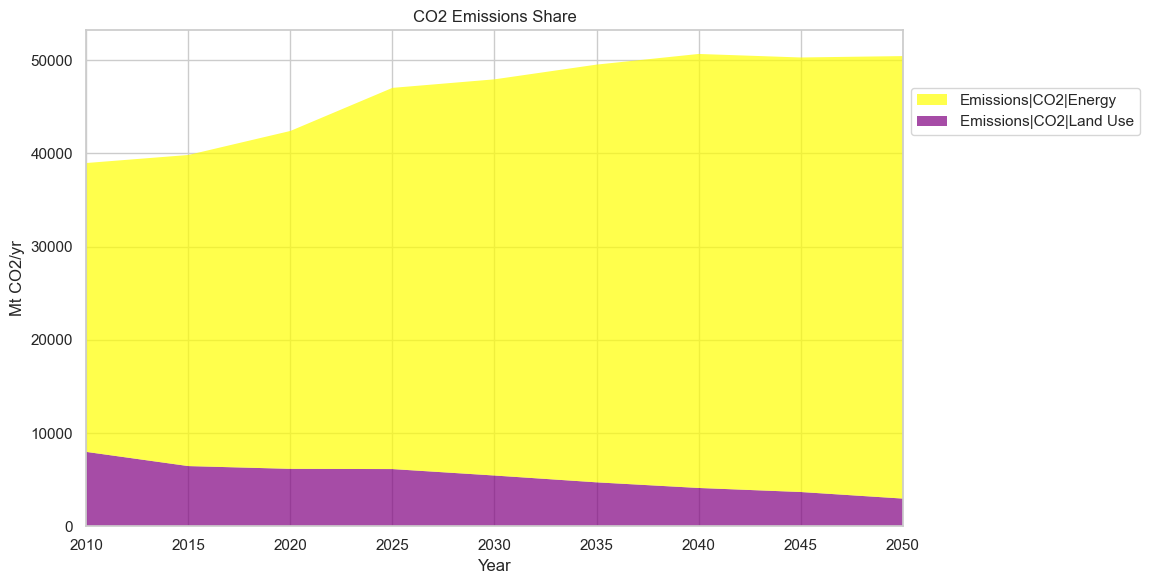

In [4]:
df_geo_co2 = pyam.read_iiasa(
    'geo7_internal',
    variable=['Emissions|CO2|AFOLU',
              'Emissions|CO2|Energy',
            ],
    region='World',
    scenario='REF',
    model='AIM/Hub-Global 2.4',
)

df_geo_co2.multiply('Emissions|CO2|AFOLU', 1, 'Emissions|CO2|Land Use', ignore_units='Mt CO2/yr', append=True)


cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","purple",])

data=df_geo_co2.filter(variable=['Emissions|CO2|Energy', 'Emissions|CO2|Land Use',],)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

data.plot.stack(title='CO2 Emissions Share', ax=ax, alpha=0.7, cmap=cmap)
plt.legend(bbox_to_anchor=(1.3, 0.9))
ax.set_ylim(0, ax.get_ylim()[1])
ax.set_xlim(2010, 2050)
plt.tight_layout()


# plt.savefig(f"./plots/chapter_11/CO2_shares.png", bbox_inches="tight")
# plt.close()

# MSA

In [5]:
df_geo_msa = pyam.read_iiasa(
    'geo7_internal',
    variable=[
        'Terrestrial Biodiversity|MSA',
        'Terrestrial Biodiversity|MSA Loss|Encroachment',
        'Terrestrial Biodiversity|MSA Loss|Fragmentation',
        'Terrestrial Biodiversity|MSA Loss|Infrastructure Disturbance',
        'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change',
        'Terrestrial Biodiversity|MSA Loss|Pressure Land Use',
        'Terrestrial Biodiversity|MSA Loss|Pressure Nitrogen',
            ],
    region='World',
    scenario='REF',
    
)

df_geo_msa.timeseries()

pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-02-05 16:05:45 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-02-05 16:05:45 INFO     You are connected as user `LaszloVreedenburgh`


1970  \
model            scenario region variable                                           unit              
IMAGE-GLOBIO 3.3 REF      World  Terrestrial Biodiversity|MSA                       %     61.411653   
                                 Terrestrial Biodiversity|MSA Loss|Encroachment     %      2.878546   
                                 Terrestrial Biodiversity|MSA Loss|Fragmentation    %      2.129869   
                                 Terrestrial Biodiversity|MSA Loss|Infrastructur... %      3.348111   
                                 Terrestrial Biodiversity|MSA Loss|Pressure Clim... %      4.733309   
                                 Terrestrial Biodiversity|MSA Loss|Pressure Land... %     21.448494   
                                 Terrestrial Biodiversity|MSA Loss|Pressure Nitr... %      3.893301   

                                                                                               2000  \
model            scenario region variable                                           unit              
IMAGE-GLOBIO 3.3 REF      World  Terrestrial Biodiversity|MSA                       %     59.164062   
                                 Terrestrial Biodiversity|MSA Loss|Encroachment     %      2.578764   
                                 Terrestrial Biodiversity|MSA Loss|Fragmentation    %      2.070362   
                                 Terrestrial Biodiversity|MSA Loss|Infrastructur... %      3.282130   
                                 Terrestrial Biodiversity|MSA Loss|Pressure Clim... %      5.836520   
                                 Terrestrial Biodiversity|MSA Loss|Pressure Land... %     22.997695   
                                 Terrestrial Biodiversity|MSA Loss|Pressure Nitr... %      3.913703   

                                                                                               2015  \
model            scenario region variable                                           unit              
IMAGE-GLOBIO 3.3 REF      World  Terrestrial Biodiversity|MSA                       %     58.130063   
                                 Terrestrial Biodiversity|MSA Loss|Encroachment     %      2.457046   
                                 Terrestrial Biodiversity|MSA Loss|Fragmentation    %      2.041591   
                                 Terrestrial Biodiversity|MSA Loss|Infrastructur... %      3.241028   
                                 Terrestrial Biodiversity|MSA Loss|Pressure Clim... %      6.444635   
                                 Terrestrial Biodiversity|MSA Loss|Pressure Land... %     23.516853   
                                 Terrestrial Biodiversity|MSA Loss|Pressure Nitr... %      4.012047   

                                                                                               2030  \
model            scenario region variable                                           unit              
IMAGE-GLOBIO 3.3 REF      World  Terrestrial Biodiversity|MSA                       %     56.614777   
                                 Terrestrial Biodiversity|MSA Loss|Encroachment     %      2.241415   
                                 Terrestrial Biodiversity|MSA Loss|Fragmentation    %      1.987628   
                                 Terrestrial Biodiversity|MSA Loss|Infrastructur... %      3.200962   
                                 Terrestrial Biodiversity|MSA Loss|Pressure Clim... %      7.487668   
                                 Terrestrial Biodiversity|MSA Loss|Pressure Land... %     24.422658   
                                 Terrestrial Biodiversity|MSA Loss|Pressure Nitr... %      3.888153   

                                                                                               2050  \
model            scenario region variable                                           unit              
IMAGE-GLOBIO 3.3 REF      World  Terrestrial Biodiversity|MSA                       %     54.695916   
                                 Terrestrial Biodiversity|MSA Loss|Encroac

In [6]:
# Define the new order of columns
new_variable_order = ['Terrestrial Biodiversity|MSA Loss|Pressure Land Use',
                    'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change',
                    'Terrestrial Biodiversity|MSA Loss|Pressure Nitrogen',
                    'Terrestrial Biodiversity|MSA Loss|Infrastructure Disturbance',
                    'Terrestrial Biodiversity|MSA Loss|Encroachment',
                    'Terrestrial Biodiversity|MSA Loss|Fragmentation',
                    ] 



# Sort the DataFrame based on the variable names column and the new order
df_data = df_geo_msa.filter(year=[2015, 2030, 2050], variable=new_variable_order).data.sort_values(by='variable', key=lambda x: pd.Categorical(x, categories=new_variable_order, ordered=True))

# # Update the Pyam DataFrame with the modified pandas DataFrame
# df = pyam.IamDataFrame(df_data)


# # Now df contains the DataFrame with columns in the new order
# df.timeseries()
df_data

,model,scenario,region,variable,unit,year,value
14,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA Loss|Pressure Lan...,%,2050,25.711807
13,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA Loss|Pressure Lan...,%,2030,24.422658
12,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA Loss|Pressure Lan...,%,2015,23.516853
11,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA Loss|Pressure Cli...,%,2050,8.601900
10,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA Loss|Pressure Cli...,%,2030,7.487668
9,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA Loss|Pressure Cli...,%,2015,6.444635
17,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA Loss|Pressure Nit...,%,2050,3.780579
15,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA Loss|Pressure Nit...,%,2015,4.012047
16,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA Loss|Pressure Nit...,%,2030,3.888153
8,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA Loss|Infrastructu...,%,2050,3.155085


Text(0, 0.5, '% MSA')

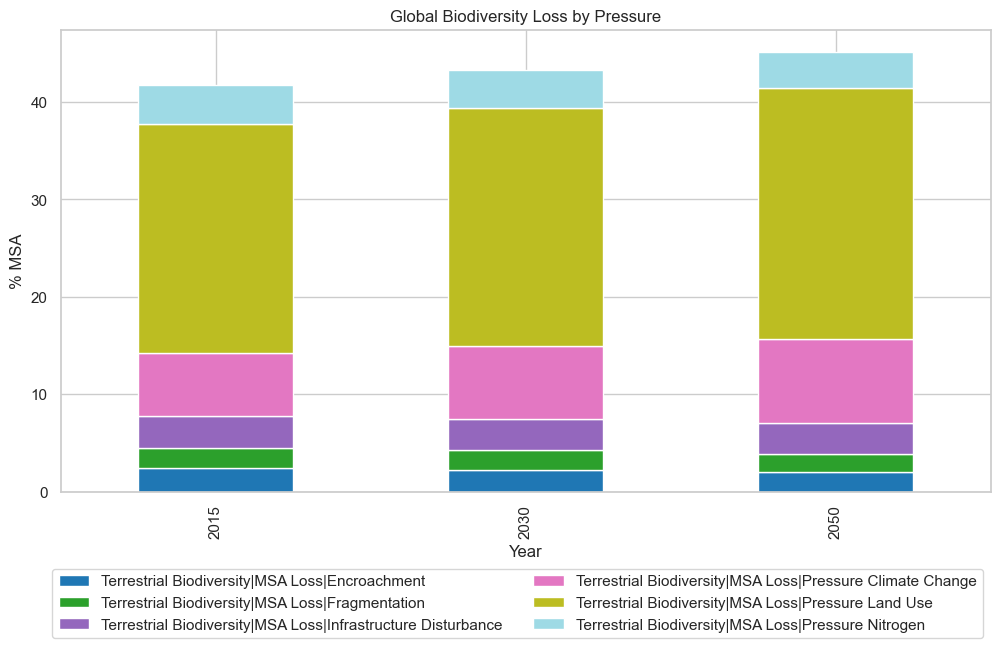

In [4]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","purple",])

data = df_geo_msa.filter(year=[2015, 2030, 2050])

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

data.plot.bar(
#    x='year', 
   bars="variable", 
   stacked=True, 
   title="Global Biodiversity Loss by Pressure", 
   cmap='tab20', 
   ax=ax,
   # alpha=0.7
)


plt.legend(bbox_to_anchor=(1, -0.15), ncols=2)
ax.set_ylabel('% MSA')
# ax.set_ylim(0, ax.get_ylim()[1])
# ax.set_xlim(2010, 2100)
# plt.tight_layout()


# plt.savefig(f"./plots/chapter_11/CO2_shares.png", bbox_inches="tight")
# plt.close()

Text(0.5, 1.0, 'Mean Species Abundance')

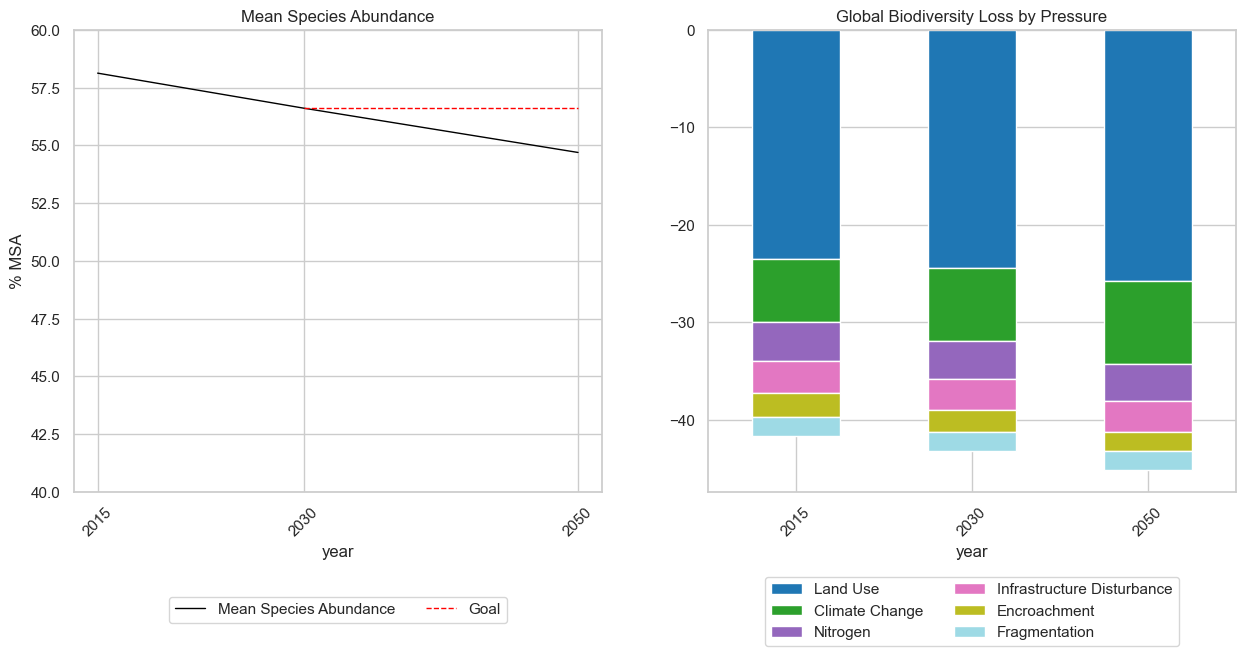

In [7]:
# Plotting
fig, axes = plt.subplots(figsize=(15, 6), ncols=2)

df_negative = df_data.groupby(['year', 'variable', ])['value'].sum().unstack() * -1
# Reorder bars
df_negative = df_negative[new_variable_order]
df_negative.rename(columns={
    'Terrestrial Biodiversity|MSA Loss|Pressure Land Use':'Land Use',
    'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change':'Climate Change',
    'Terrestrial Biodiversity|MSA Loss|Pressure Nitrogen':'Nitrogen',
    'Terrestrial Biodiversity|MSA Loss|Infrastructure Disturbance':'Infrastructure Disturbance',
    'Terrestrial Biodiversity|MSA Loss|Encroachment':'Encroachment',
    'Terrestrial Biodiversity|MSA Loss|Fragmentation':'Fragmentation',
}, inplace=True 
)

df_negative.plot(kind='bar', 
                 stacked=True,
                 ax=axes[1],
                 title="Global Biodiversity Loss by Pressure", 
                 cmap='tab20', )


df_msa_only = df_geo_msa.filter(year=[2015, 2030, 2050], variable='Terrestrial Biodiversity|MSA').data
sns.lineplot(
        data=df_msa_only,
        x="year",
        y="value",
        linewidth=1,
        ax=axes[0],
        color='black',
        # linestyle='--'
        label='Mean Species Abundance',
        )

# Target
target_df = df_msa_only.copy()
target_df = target_df[target_df.year.isin([2030, 2050])]
target_df['value'] = target_df[target_df['year'] == 2030]['value'].iloc[0]

sns.lineplot(
        data=target_df,
        x="year",
        y="value",
        linewidth=1,
        ax=axes[0],
        color='red',
        linestyle='--',
        label='Goal'
        )

axes[0].set_ylim(40, 60)
# plt.legend(bbox_to_anchor=(0.73, -0.15), ncols=2)
axes[0].set_ylabel('% MSA')
axes[0].set_xticks([2015, 2030, 2050])
axes[0].set_xticklabels([2015, 2030, 2050], rotation=45)
axes[1].set_xticklabels([2015, 2030, 2050], rotation=45)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncols=2)
axes[1].legend(df_negative.columns, loc='lower center', bbox_to_anchor=(0.5, -0.35), ncols=2)

axes[0].set_title('Mean Species Abundance')

(40.0, 60.0)

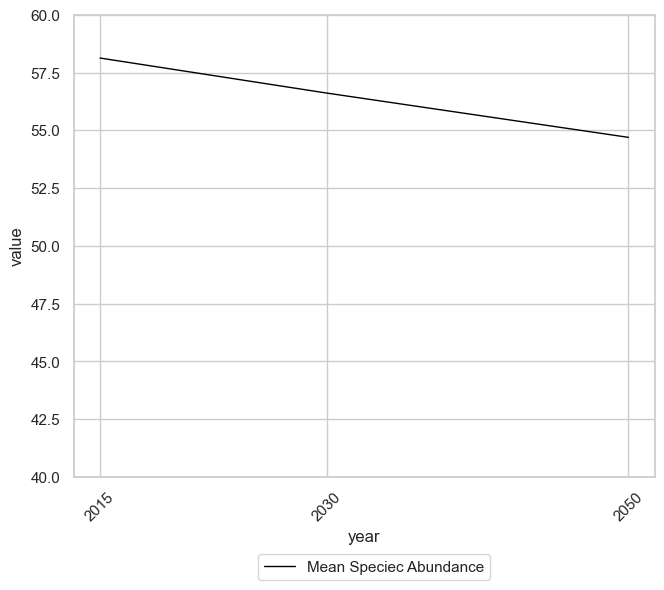

In [32]:
# Plotting
fig, ax = plt.subplots(figsize=(7.5, 6),)

sns.lineplot(
        data=df_msa_only,
        x="year",
        y="value",
        linewidth=1,
        ax=ax,
        color='black',
        # linestyle='--'
        label='Mean Speciec Abundance'
        )
plt.legend(bbox_to_anchor=(0.73, -0.15), ncols=2)
plt.xticks([2015, 2030, 2050], rotation=45)
plt.ylim(40, 60)
plt.ylabel('')


In [14]:
df_msa_only = df_geo_msa.filter(year=[2015, 2030, 2050], variable='Terrestrial Biodiversity|MSA').data
df_msa_only

,model,scenario,region,variable,unit,year,value
0,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA,%,2015,58.130063
1,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA,%,2030,56.614777
2,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA,%,2050,54.695916


In [59]:

target_df

,model,scenario,region,variable,unit,year,value
1,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA,%,2030,56.614777
2,IMAGE-GLOBIO 3.3,REF,World,Terrestrial Biodiversity|MSA,%,2050,56.614777


56.61477740856509

# IFs

In [174]:
df_geo_ifs = pyam.read_iiasa(
    'geo7_internal',
    scenario=['REF', 'TECH-TP', 'LIFE-TP'],
    region='World',
    model='IF*',
    
)

pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-01-19 14:51:22 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-01-19 14:51:22 INFO     You are connected as user `LaszloVreedenburgh`


In [176]:
df_geo_ifs.filter(variable='Population|Poverty Under $2.15', year=[2030, 2040, 2050]).timeseries()

2030   2040  \
model    scenario region variable                       unit                 
IFs 8.12 LIFE-TP  World  Population|Poverty Under $2.15 %     6.918  4.740   
         REF      World  Population|Poverty Under $2.15 %     7.304  5.413   
         TECH-TP  World  Population|Poverty Under $2.15 %     6.802  4.704   

                                                               2050  
model    scenario region variable                       unit         
IFs 8.12 LIFE-TP  World  Population|Poverty Under $2.15 %     2.971  
         REF      World  Population|Poverty Under $2.15 %     3.821  
         TECH-TP  World  Population|Poverty Under $2.15 %     3.238

# GNM

In [31]:
df_geo_gnm = pyam.read_iiasa(
    'geo7_internal',
    variable=['Resources|Nitrogen|Cropland Budget|Balance', 
              'Resources|Nitrogen|Pasture Budget|Balance',],
    # variable=[
        # 'Resources|Nitrogen|Cropland Budget|Inputs|Biological Fixation',
        # 'Resources|Nitrogen|Cropland Budget|Inputs|Fertilizer',
        # 'Resources|Nitrogen|Cropland Budget|Inputs|Manure',
        # 'Resources|Nitrogen|Pasture Budget|Inputs|Biological Fixation',
        # 'Resources|Nitrogen|Pasture Budget|Inputs|Fertilizer',
        # 'Resources|Nitrogen|Pasture Budget|Inputs|Manure',
        # 'Resources|Nitrogen|Non-Agricultural Land Budget|Inputs|Biological Fixation',
        # 'Resources|Phosphorus|Cropland Budget|Inputs|Fertilizer',
        # 'Resources|Phosphorus|Cropland Budget|Inputs|Manure Recycled from Confinements',
        # 'Resources|Phosphorus|Pasture Budget|Inputs|Fertilizer',
        # 'Resources|Phosphorus|Pasture Budget|Inputs|Manure',],
    scenario=['REF'],
    region='World',
    model='IMAGE-GNM 3.3',
)



pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-02-06 11:46:02 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-02-06 11:46:02 INFO     You are connected as user `LaszloVreedenburgh`


In [32]:
df_geo_gnm.variable

['Resources|Nitrogen|Cropland Budget|Balance',
 'Resources|Nitrogen|Pasture Budget|Balance']

c:\Users\vreedenbul\AppData\Local\miniconda3\Lib\site-packages\pyam\plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  pd.concat([_df, _rows.loc[_rows.index.difference(_df.index)]])
c:\Users\vreedenbul\AppData\Local\miniconda3\Lib\site-packages\pyam\plotting.py:485: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _df_pos = _df.applymap(lambda x: max(x, 0))
c:\Users\vreedenbul\AppData\Local\miniconda3\Lib\site-packages\pyam\plotting.py:486: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _df_neg = _df.applymap(lambda x: min(x, 0))


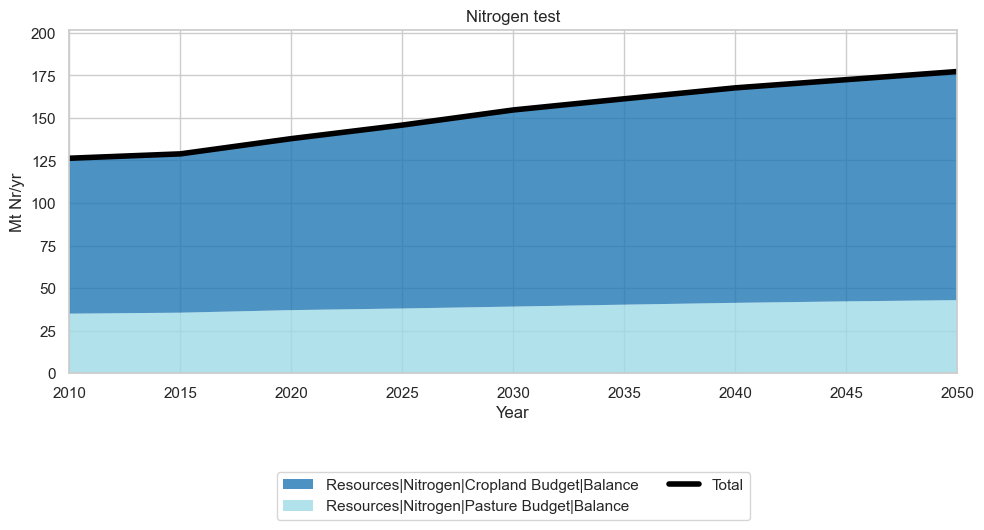

In [33]:


data=df_geo_gnm.filter(variable=['Resources|Nitrogen*'],)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

data.plot.stack(title='Nitrogen test', 
                ax=ax, 
                alpha=0.8, 
                cmap='tab20',
                total=True)

ax.legend( loc='lower center', bbox_to_anchor=(0.5, -0.45), ncols=2)
ax.set_ylim(0, ax.get_ylim()[1])
ax.set_xlim(2010, 2050)
plt.tight_layout()


# plt.savefig(f"

# Klad

In [206]:
emissions_data_geo[emissions_data_geo['variable'] == variable]['value'].iloc[0]
category_bottom = [bottom_values[j] for j in range(len(bottom_values)) if emissions_data_geo['variable'].iloc[j] == variable]

1970.2429

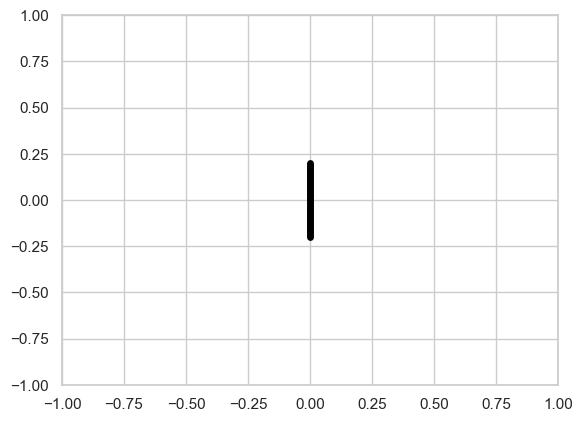

In [262]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

# Create a Line2D with a solid line and round capstyle
line = Line2D([0, 0], [-0.2, 0.2], color='black', linestyle='-', linewidth=5)

# Add the Line2D to the axes
ax.add_line(line)

# Set axis limits for visibility
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()


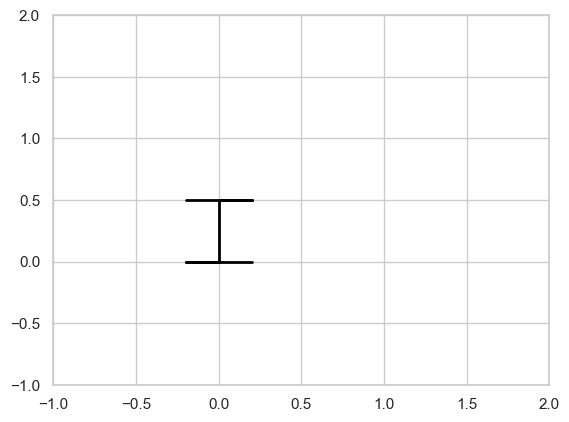

In [268]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create a figure and axis
fig, ax = plt.subplots()

# Define the coordinates for the line in the shape of |--|
line_y = [0,    0,  0,      0, 0.5, 0.5, 0.5,]
line_x = [0.2,  0,  -0.2,   0, 0, 0.2, -0.2,]

# Create a Line2D with the specified coordinates
line = Line2D(line_x, line_y, color='black', linestyle='-', linewidth=2)

# Add the Line2D to the axes
ax.add_line(line)

ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
plt.show()


In [203]:
for i, variable in enumerate(var_colors.keys()):
    print(i, variable)

0 Emissions|CO2
1 Emissions|CH4
2 Emissions|N2O
3 Emissions|F-Gases


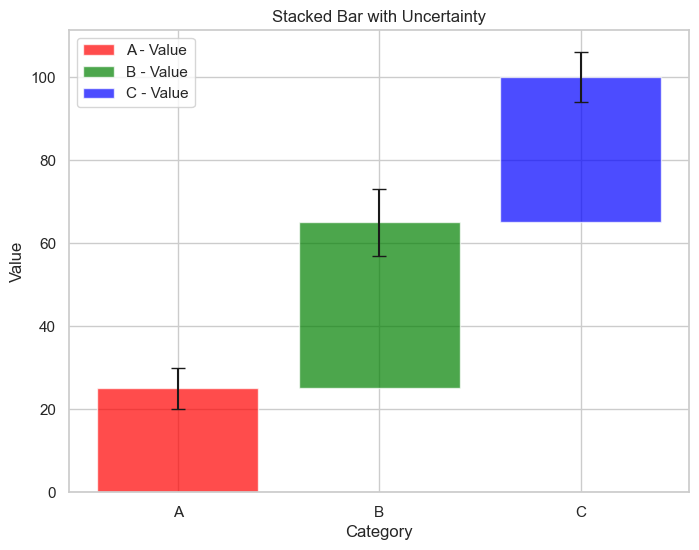

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame
data = {
    'Category': ['A', 'B', 'C'],
    'Value': [25, 40, 35],
    'Uncertainty': [5, 8, 6]  # This could represent standard deviation or confidence interval
}

df = pd.DataFrame(data)

# Calculate bottom values for stacking
bottom_values = [0] + df['Value'].cumsum().tolist()[:-1]

# Assign colors to each category
category_colors = {'A': 'red', 'B': 'green', 'C': 'blue'}

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Stacked bar plot with error bars for uncertainty
for category, color in category_colors.items():
    category_values = df[df['Category'] == category]['Value'].values
    category_uncertainty = df[df['Category'] == category]['Uncertainty'].values
    category_bottom = [bottom_values[j] for j in range(len(bottom_values)) if df['Category'].iloc[j] == category]
    plt.bar(
        x=df[df['Category'] == category].index,  # Use index values directly
        height=category_values,
        bottom=category_bottom,
        color=color,
        alpha=0.7,
        label=f'{category} - Value',
        yerr=category_uncertainty,
        capsize=5  # Size of the error bar caps
    )

# Set x-axis ticks and labels
plt.xticks(range(len(df)), df['Category'].tolist())

plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Stacked Bar with Uncertainty')
plt.legend()

plt.show()


,Category,Value,Uncertainty,Year
0,A,-25,5,2050
1,B,40,8,2050
2,C,35,6,2050


2024-01-18 14:34:40 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-18 14:34:40 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-18 14:34:40 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-18 14:34:40 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


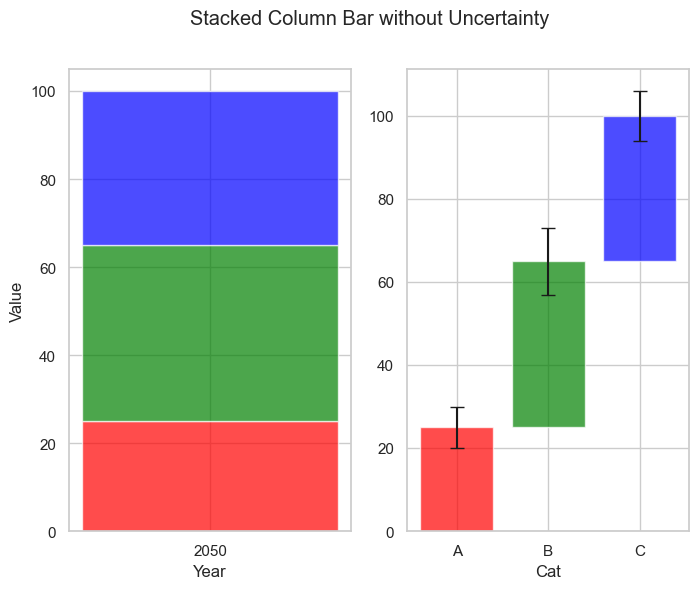

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame
data = {
    'Category': ['A', 'B', 'C'],
    'Value': [25, 40, 35],
    'Uncertainty': [5, 8, 6],  # This could represent standard deviation or confidence interval
    'Year': [2050, 2050, 2050]
}

df = pd.DataFrame(data)

# Plotting
fig, axes = plt.subplots(figsize=(8, 6), ncols=2, nrows=1)
# Assign colors to each category
category_colors = {'A': 'red', 'B': 'green', 'C': 'blue'}

# Stacked column bar plot without error bars
for i, category in enumerate(df['Category']):
    category_values = df['Value'].iloc[i]
    category_bottom = df['Value'].iloc[:i].sum()
    category_uncertainty = df[df['Category'] == category]['Uncertainty'].values
    axes[0].bar(
        x=str(df['Year'].iloc[i]),
        height=category_values,
        bottom=category_bottom,
        color=category_colors[category],  # You can specify different colors here
        alpha=0.7,
        label=f'{category} - Value',
        
    )
    
    axes[1].bar(
        x=category,  # Use index values directly
        height=category_values,
        bottom=category_bottom,
        color=category_colors[category],
        yerr=category_uncertainty,
        capsize=5,
        alpha=0.7,
        label=f'{category} - Value',
        
    )


axes[0].set_xlabel('Year')
axes[0].set_ylabel('Value')
axes[1].set_xlabel('Cat')

plt.suptitle('Stacked Column Bar without Uncertainty')


plt.show()


In [119]:
category_uncertainty

array([6], dtype=int64)

2024-01-12 14:34:02 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-12 14:34:02 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-12 14:34:02 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-12 14:34:02 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


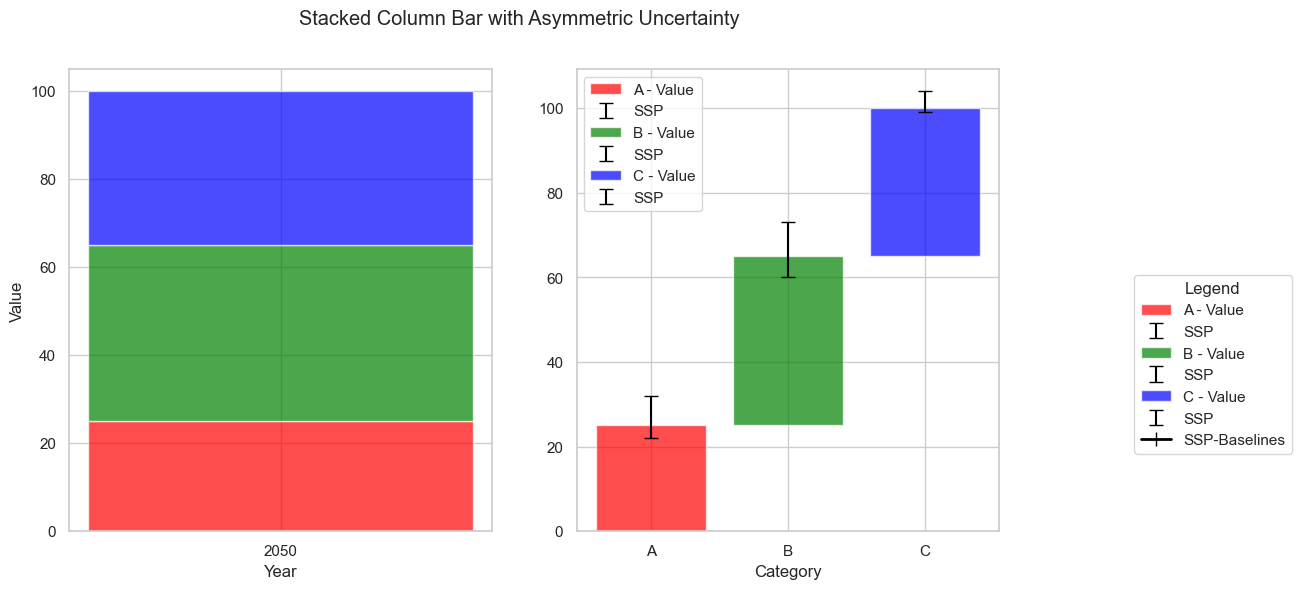

In [168]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

# Example DataFrame
data = {
    'Category': ['A', 'B', 'C'],
    'Value': [25, 40, 35],
    'Uncertainty_lower': [3, 5, 1],  # Lower uncertainty values
    'Uncertainty_upper': [7, 8, 4],  # Upper uncertainty values
    'Year': [2050, 2050, 2050]
}

df = pd.DataFrame(data)

# Plotting
fig, axes = plt.subplots(figsize=(12, 6), ncols=2, nrows=1)
# Assign colors to each category
category_colors = {'A': 'red', 'B': 'green', 'C': 'blue'}
legend_elements = [] 

# Stacked column bar plot with error bars
for i, category in enumerate(df['Category']):
    category_values = df['Value'].iloc[i]
    category_bottom = df['Value'].iloc[:i].sum()
    
    # Plot on the first axes
    axes[0].bar(
        x=str(df['Year'].iloc[i]),
        height=category_values,
        bottom=category_bottom,
        color=category_colors[category],
        alpha=0.7,
        label=f'{category} - Value',
    )
    
    # Plot on the second axes
    axes[1].bar(
        x=category,  # Use index values directly
        height=category_values,
        bottom=category_bottom,
        color=category_colors[category],
        alpha=0.7,
        label=f'{category} - Value',
    )

    # Plot asymmetric uncertainty bars
    lower_uncertainty = df['Uncertainty_lower'].iloc[i]
    upper_uncertainty = df['Uncertainty_upper'].iloc[i]
    # axes[0].errorbar(
    #     x=str(df['Year'].iloc[i]),
    #     y=category_bottom + category_values,
    #     yerr=[[lower_uncertainty], [upper_uncertainty]],
    #     color='black',
    #     linestyle='None',
    #     capsize=5
    # )

    axes[1].errorbar(
        x=category,
        y=category_bottom + category_values,
        yerr=[[lower_uncertainty], [upper_uncertainty]],
        color='black',
        linestyle='None',
        capsize=5,
        label='SSP'
    )

    # # Save legend element for uncertainty bars
    # legend_elements.append(Line2D([0], [0], color='black', capsize=2,
    #                                label='SSP'))


# Set x-label for each subplot
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Category')

axes[0].set_ylabel('Value')

axes[1].legend()

# Manually add Legend
handles, labels = axes[1].get_legend_handles_labels()
legend_patch = Line2D([0, 0], [0, 0], color='black', linestyle='-', linewidth=2, marker='|', markersize=10, label=f'{category} - Uncertainty')
handles = handles + [legend_patch]
labels = labels + ['SSP-Baselines']
fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.15, 0.55))

# Set suptitle for the entire figure
plt.suptitle('Stacked Column Bar with Asymmetric Uncertainty')
plt.show()



In [159]:
Line2D([0, 0], [0, 0], color='black', marker='o', linestyle='-', markersize=5, label=f'{category} - Uncertainty')
